In [1]:
import numpy as np
import pandas as pd
import time
import os
import re
import copy
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import math

# ExpW

In [2]:
frame = pd.read_csv('ExpW_OpenFace_result_with_expression_gender_race_age.csv')
frame.head()

,ImageName,Expression,race_preds,gender_preds,age_preds,race_scores,gender_scores,age_scores,face,confidence,...,AU10_r,AU12_r,AU14_r,AU15_r,AU17_r,AU20_r,AU23_r,AU25_r,AU26_r,AU45_r
0,angry_actor_104_0.jpg,0,Black,Male,20-29,[0.01164725 0.5489195 0.06282789 0.03017501 0...,[0.97893476 0.02106526],[0.00264865 0.03285832 0.07209051 0.29417548 0...,0.0,0.875,...,0.00,0.41,3.61,0.54,1.10,0.68,0.00,2.23,0.00,0.17
1,angry_actor_109_0.jpg,0,Middle Eastern,Male,10-19,[0.07172439 0.03716405 0.07634144 0.09301798 0...,[0.9886888 0.01131118],[5.5791729e-04 2.5763142e-01 4.3460685e-01 2.5...,0.0,0.925,...,1.16,0.76,0.77,1.12,0.04,1.38,0.00,1.20,0.00,0.00
2,angry_actor_120_1.jpg,2,White,Male,20-29,[0.38725546 0.02379545 0.04428627 0.3587341 0...,[0.7577495 0.24225047],[0.00361199 0.02466666 0.0458126 0.62581354 0...,1.0,0.925,...,0.06,0.00,1.51,0.00,0.00,0.00,0.00,1.09,0.51,0.10
3,angry_actor_13_0.jpg,3,East Asian,Female,20-29,[0.05252786 0.06977403 0.0932842 0.40103135 0...,[0.46038443 0.5396156 ],[0.00304344 0.0880671 0.22934933 0.39468738 0...,0.0,0.975,...,0.99,0.00,0.00,0.36,0.56,0.00,0.13,0.96,1.02,0.00
4,angry_actor_132_0.jpg,0,White,Female,20-29,[0.29344454 0.09408408 0.14308809 0.2740257 0...,[0.44868255 0.55131745],[0.00321869 0.0189087 0.0630689 0.40079823 0...,0.0,0.875,...,0.05,0.00,0.13,0.00,0.76,0.00,0.25,0.00,0.06,0.00


In [3]:
print(list(frame.columns))

['ImageName', 'Expression', 'race_preds', 'gender_preds', 'age_preds', 'race_scores', 'gender_scores', 'age_scores', 'face', 'confidence', 'AU01_c', 'AU02_c', 'AU04_c', 'AU05_c', 'AU06_c', 'AU07_c', 'AU09_c', 'AU10_c', 'AU12_c', 'AU14_c', 'AU15_c', 'AU17_c', 'AU20_c', 'AU23_c', 'AU25_c', 'AU26_c', 'AU28_c', 'AU45_c', 'x_0', 'x_1', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8', 'x_9', 'x_10', 'x_11', 'x_12', 'x_13', 'x_14', 'x_15', 'x_16', 'x_17', 'x_18', 'x_19', 'x_20', 'x_21', 'x_22', 'x_23', 'x_24', 'x_25', 'x_26', 'x_27', 'x_28', 'x_29', 'x_30', 'x_31', 'x_32', 'x_33', 'x_34', 'x_35', 'x_36', 'x_37', 'x_38', 'x_39', 'x_40', 'x_41', 'x_42', 'x_43', 'x_44', 'x_45', 'x_46', 'x_47', 'x_48', 'x_49', 'x_50', 'x_51', 'x_52', 'x_53', 'x_54', 'x_55', 'x_56', 'x_57', 'x_58', 'x_59', 'x_60', 'x_61', 'x_62', 'x_63', 'x_64', 'x_65', 'x_66', 'x_67', 'y_0', 'y_1', 'y_2', 'y_3', 'y_4', 'y_5', 'y_6', 'y_7', 'y_8', 'y_9', 'y_10', 'y_11', 'y_12', 'y_13', 'y_14', 'y_15', 'y_16', 'y_17', 'y_18', 'y_19

In [4]:
frame[['AU04_c', 'AU05_c', 'AU07_c', 'AU23_c']].corr()

,AU04_c,AU05_c,AU07_c,AU23_c
AU04_c,1.000000,-0.113466,0.105905,0.037587
AU05_c,-0.113466,1.000000,-0.166187,-0.015331
AU07_c,0.105905,-0.166187,1.000000,0.032415
AU23_c,0.037587,-0.015331,0.032415,1.000000


In [5]:
frame[['AU04_r', 'AU05_r', 'AU07_r', 'AU23_r']].corr()

,AU04_r,AU05_r,AU07_r,AU23_r
AU04_r,1.000000,-0.024902,0.179037,-0.005776
AU05_r,-0.024902,1.000000,-0.131142,0.015627
AU07_r,0.179037,-0.131142,1.000000,0.041884
AU23_r,-0.005776,0.015627,0.041884,1.000000


# ExpW expression label：
- "0" "angry"
- "1" "disgust"
- "2" "fear"
- "3" "happy"
- "4" "sad"
- "5" "surprise"
- "6" "neutral"

In [6]:
frame.loc[frame['Expression'] == 0, 'Expression'] = 'angry'
frame.loc[frame['Expression'] == 1, 'Expression'] = 'disgust'
frame.loc[frame['Expression'] == 2, 'Expression'] = 'fear'
frame.loc[frame['Expression'] == 3, 'Expression'] = 'happy'
frame.loc[frame['Expression'] == 4, 'Expression'] = 'sad'
frame.loc[frame['Expression'] == 5, 'Expression'] = 'surprise'
frame.loc[frame['Expression'] == 6, 'Expression'] = 'neutral'
frame.Expression.value_counts()

neutral     33927
happy       28893
sad         10429
surprise     6880
disgust      3805
angry        3602
fear         1064
Name: Expression, dtype: int64

In [7]:
frame['Angry'] = (frame['Expression'] =='angry').astype(int)
frame['Disgust'] = (frame['Expression'] == 'disgust').astype(int)
frame['Fear'] = (frame['Expression'] == 'fear').astype(int)
frame['Happy'] = (frame['Expression'] =='happy').astype(int)
frame['Sad'] = (frame['Expression'] == 'sad').astype(int)
frame['Surprise'] = (frame['Expression'] == 'surprise').astype(int)
frame['Neutral'] = (frame['Expression'] == 'neutral').astype(int)

In [8]:
frame = frame.dropna()
frame.shape

(85355, 188)

# Using the optimal threshold to re-create the AU presence

In [9]:
AU_intensity_OpenFace_common2 = ['AU01_r', 'AU02_r', 'AU04_r', 'AU05_r', 'AU06_r', 'AU09_r', 'AU10_r', 
                'AU12_r', 'AU15_r', 'AU17_r', 'AU20_r', 'AU25_r', 'AU26_r']
optimal_threshold = np.array([4.4, 4.8, 2.4, 3.7, 1.8, 2.8, 0.2, 1.3, 1.3, 5. , 5. , 0.7, 5. ])
for i in range(len(AU_intensity_OpenFace_common2)):
    frame[AU_intensity_OpenFace_common2[i] + "_c"] = frame[AU_intensity_OpenFace_common2[i]].apply(lambda x: 0 if x <= optimal_threshold[i] else 1)

frame.shape

(85355, 201)

In [10]:
print(list(frame.columns))

['ImageName', 'Expression', 'race_preds', 'gender_preds', 'age_preds', 'race_scores', 'gender_scores', 'age_scores', 'face', 'confidence', 'AU01_c', 'AU02_c', 'AU04_c', 'AU05_c', 'AU06_c', 'AU07_c', 'AU09_c', 'AU10_c', 'AU12_c', 'AU14_c', 'AU15_c', 'AU17_c', 'AU20_c', 'AU23_c', 'AU25_c', 'AU26_c', 'AU28_c', 'AU45_c', 'x_0', 'x_1', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8', 'x_9', 'x_10', 'x_11', 'x_12', 'x_13', 'x_14', 'x_15', 'x_16', 'x_17', 'x_18', 'x_19', 'x_20', 'x_21', 'x_22', 'x_23', 'x_24', 'x_25', 'x_26', 'x_27', 'x_28', 'x_29', 'x_30', 'x_31', 'x_32', 'x_33', 'x_34', 'x_35', 'x_36', 'x_37', 'x_38', 'x_39', 'x_40', 'x_41', 'x_42', 'x_43', 'x_44', 'x_45', 'x_46', 'x_47', 'x_48', 'x_49', 'x_50', 'x_51', 'x_52', 'x_53', 'x_54', 'x_55', 'x_56', 'x_57', 'x_58', 'x_59', 'x_60', 'x_61', 'x_62', 'x_63', 'x_64', 'x_65', 'x_66', 'x_67', 'y_0', 'y_1', 'y_2', 'y_3', 'y_4', 'y_5', 'y_6', 'y_7', 'y_8', 'y_9', 'y_10', 'y_11', 'y_12', 'y_13', 'y_14', 'y_15', 'y_16', 'y_17', 'y_18', 'y_19

In [11]:
frame['AU4_5_7_23_c'] = frame.AU04_c.apply(int).apply(str) + frame.AU05_c.apply(int).apply(str) + frame.AU07_c.apply(int).apply(str) + frame.AU23_c.apply(int).apply(str)
frame.AU4_5_7_23_c.value_counts()

0010    11911
1010    10619
0000    10358
0100    10126
1000     6786
0110     5777
1011     4487
1100     4176
0011     4028
1110     3527
0001     3325
0101     3051
1001     2373
0111     1981
1111     1426
1101     1404
Name: AU4_5_7_23_c, dtype: int64

In [12]:
frame['AU4_5_7_23_r_c'] = frame.AU04_r_c.apply(str) + frame.AU05_r_c.apply(str) + frame.AU07_c.apply(int).apply(str) + frame.AU23_c.apply(int).apply(str)
frame.AU4_5_7_23_r_c.value_counts()

0000    30580
0010    30516
0011    11437
0001     9926
1010     1220
1011      452
0100      445
1000      419
1001      137
0110       94
0101       89
0111       33
1110        4
1100        2
1101        1
Name: AU4_5_7_23_r_c, dtype: int64

# P(expression|AU1, male) =? P(expression|AU1, female)

In [13]:
male_frame = frame.loc[frame['gender_preds'] == 'Male']
female_frame = frame.loc[frame['gender_preds'] == 'Female']
print(male_frame.shape)
print(female_frame.shape)

(58929, 203)
(26426, 203)


## Anger

#### First check the simple proportion of male angry vs female angry:

In [14]:
print(male_frame.Angry.mean())
print(female_frame.Angry.mean())

0.04349301702048228
0.03523045485506698


In [15]:
print(male_frame.AU04_r_c.mean())
print(female_frame.AU04_r_c.mean())

0.026472534745201854
0.025543025807916446


In [16]:
print(male_frame.AU05_r_c.mean())
print(female_frame.AU05_r_c.mean())

0.007585399378913608
0.00836297585711042


In [17]:
print(male_frame.AU07_c.mean())
print(female_frame.AU07_c.mean())

0.5117853688336812
0.5145311435707258


In [18]:
print(male_frame.AU23_c.mean())
print(female_frame.AU23_c.mean())

0.2773846493237625
0.2167940664497086


In [19]:
print((male_frame.AU4_5_7_23_c=='1111').mean())
print((female_frame.AU4_5_7_23_c=='1111').mean())

0.018191382850548967
0.013395897979262847


In [20]:
print(1-(male_frame.AU4_5_7_23_c=='0000').mean())
print(1-(female_frame.AU4_5_7_23_c=='0000').mean())

0.8802457194250708
0.8750851434193597


#### Now check for conditional probability, controlled by AU:

In [26]:
result_df = pd.concat([pd.crosstab(male_frame.AU04_r_c, male_frame.Angry, normalize = 'index')[1], pd.crosstab(female_frame.AU04_r_c, female_frame.Angry, normalize = 'index')[1]], axis=1)
result_df.columns = ['male', 'female']
result_df['diff'] = result_df.female - result_df.male
for index, row in result_df.iterrows():
    cross_tab = pd.crosstab(frame[frame.AU04_r_c == index].gender_preds, frame[frame.AU04_r_c == index].Angry, margins = True)

    cross_tab.columns = ["Not Angry", "Angry", "row_totals"]
    cross_tab.index = ["Female", "Male", "col_totals"]
    observed = cross_tab.iloc[0:2,0:2]   # Get table without totals for later use

    expected =  np.outer(cross_tab["row_totals"][0:2],
                     cross_tab.loc["col_totals"][0:2]) / len(frame[frame.AU04_r_c == index])

    expected = pd.DataFrame(expected)
    expected.columns = ["Not Angry", "Angry"]
    expected.index = ["Female", "Male"]

    if (expected>=5).sum().sum() == 4:
        chi_squared_stat = (((observed-expected)**2)/expected).sum().sum()
        p_value = 1 - stats.chi2.cdf(x=chi_squared_stat, df=1)
    else:
        chi_squared_stat = np.nan
        p_value = np.nan

    print(chi_squared_stat)
    
    result_df.loc[index, "p-value"] = p_value
result_df

29.991401082908745
1.4117880437754304


,male,female,diff,p-value
AU04_r_c,,,,
0,0.040736,0.032853,-0.007883,4.339665e-08
1,0.144872,0.125926,-0.018946,2.347598e-01


In [27]:
result_df = pd.concat([pd.crosstab(male_frame.AU05_r_c, male_frame.Angry, normalize = 'index')[1], pd.crosstab(female_frame.AU05_r_c, female_frame.Angry, normalize = 'index')[1]], axis=1)
result_df.columns = ['male', 'female']
result_df['diff'] = result_df.female - result_df.male
for index, row in result_df.iterrows():
    cross_tab = pd.crosstab(frame[frame.AU05_r_c == index].gender_preds, frame[frame.AU05_r_c == index].Angry, margins = True)

    cross_tab.columns = ["Not Angry", "Angry", "row_totals"]
    cross_tab.index = ["Female", "Male", "col_totals"]
    observed = cross_tab.iloc[0:2,0:2]   # Get table without totals for later use

    expected =  np.outer(cross_tab["row_totals"][0:2],
                     cross_tab.loc["col_totals"][0:2]) / len(frame[frame.AU05_r_c == index])

    expected = pd.DataFrame(expected)
    expected.columns = ["Not Angry", "Angry"]
    expected.index = ["Female", "Male"]

    if (expected>=5).sum().sum() == 4:
        chi_squared_stat = (((observed-expected)**2)/expected).sum().sum()
        p_value = 1 - stats.chi2.cdf(x=chi_squared_stat, df=1)
    else:
        chi_squared_stat = np.nan
        p_value = np.nan

    print(chi_squared_stat)
    
    result_df.loc[index, "p-value"] = p_value
result_df

33.59635246701074
1.5935926576326376


,male,female,diff,p-value
AU05_r_c,,,,
0,0.043483,0.034955,-0.008528,6.781979e-09
1,0.044743,0.067873,0.023131,2.068136e-01


In [23]:
result_df = pd.concat([pd.crosstab(male_frame.AU07_c, male_frame.Angry, normalize = 'index')[1], pd.crosstab(female_frame.AU07_c, female_frame.Angry, normalize = 'index')[1]], axis=1)
result_df.columns = ['male', 'female']
result_df['diff'] = result_df.female - result_df.male
for index, row in result_df.iterrows():
    cross_tab = pd.crosstab(frame[frame.AU07_c == index].gender_preds, frame[frame.AU07_c == index].Angry, margins = True)

    cross_tab.columns = ["Not Angry", "Angry", "row_totals"]
    cross_tab.index = ["Female", "Male", "col_totals"]
    observed = cross_tab.iloc[0:2,0:2]   # Get table without totals for later use

    expected =  np.outer(cross_tab["row_totals"][0:2],
                     cross_tab.loc["col_totals"][0:2]) / len(frame[frame.AU07_c == index])

    expected = pd.DataFrame(expected)
    expected.columns = ["Not Angry", "Angry"]
    expected.index = ["Female", "Male"]

    if (expected>=5).sum().sum() == 4:
        chi_squared_stat = (((observed-expected)**2)/expected).sum().sum()
        p_value = 1 - stats.chi2.cdf(x=chi_squared_stat, df=1)
    else:
        chi_squared_stat = np.nan
        p_value = np.nan

    print(chi_squared_stat)
    
    result_df.loc[index, "p-value"] = p_value
result_df

20.014363940120067
13.738082963530605


,male,female,diff,p-value
AU07_c,,,,
0.0,0.033924,0.025645,-0.008279,0.000008
1.0,0.052621,0.044274,-0.008347,0.000210


In [24]:
result_df = pd.concat([pd.crosstab(male_frame.AU23_c, male_frame.Angry, normalize = 'index')[1], pd.crosstab(female_frame.AU23_c, female_frame.Angry, normalize = 'index')[1]], axis=1)
result_df.columns = ['male', 'female']
result_df['diff'] = result_df.female - result_df.male
for index, row in result_df.iterrows():
    cross_tab = pd.crosstab(frame[frame.AU23_c == index].gender_preds, frame[frame.AU23_c == index].Angry, margins = True)

    cross_tab.columns = ["Not Angry", "Angry", "row_totals"]
    cross_tab.index = ["Female", "Male", "col_totals"]
    observed = cross_tab.iloc[0:2,0:2]   # Get table without totals for later use

    expected =  np.outer(cross_tab["row_totals"][0:2],
                     cross_tab.loc["col_totals"][0:2]) / len(frame[frame.AU23_c == index])

    expected = pd.DataFrame(expected)
    expected.columns = ["Not Angry", "Angry"]
    expected.index = ["Female", "Male"]

    if (expected>=5).sum().sum() == 4:
        chi_squared_stat = (((observed-expected)**2)/expected).sum().sum()
        p_value = 1 - stats.chi2.cdf(x=chi_squared_stat, df=1)
    else:
        chi_squared_stat = np.nan
        p_value = np.nan

    print(chi_squared_stat)
    
    result_df.loc[index, "p-value"] = p_value
result_df

26.534034124565164
6.636636733021152


,male,female,diff,p-value
AU23_c,,,,
0.0,0.044525,0.035802,-0.008723,2.589359e-07
1.0,0.040805,0.033165,-0.007640,9.990236e-03


In [28]:
result_df = pd.concat([pd.crosstab(male_frame.AU4_5_7_23_r_c, male_frame.Angry, normalize = 'index')[1], pd.crosstab(female_frame.AU4_5_7_23_r_c, female_frame.Angry, normalize = 'index')[1]], axis=1)
result_df.columns = ['male', 'female']
result_df['diff'] = result_df.female - result_df.male
for index, row in result_df.iterrows():
    cross_tab = pd.crosstab(frame[frame.AU4_5_7_23_r_c == index].gender_preds, frame[frame.AU4_5_7_23_r_c == index].Angry, margins = True)

    cross_tab.columns = ["Not Angry", "Angry", "row_totals"]
    cross_tab.index = ["Female", "Male", "col_totals"]
    observed = cross_tab.iloc[0:2,0:2]   # Get table without totals for later use

    expected =  np.outer(cross_tab["row_totals"][0:2],
                     cross_tab.loc["col_totals"][0:2]) / len(frame[frame.AU4_5_7_23_r_c == index])

    expected = pd.DataFrame(expected)
    expected.columns = ["Not Angry", "Angry"]
    expected.index = ["Female", "Male"]

    if (expected>=5).sum().sum() == 4:
        chi_squared_stat = (((observed-expected)**2)/expected).sum().sum()
        p_value = 1 - stats.chi2.cdf(x=chi_squared_stat, df=1)
    else:
        chi_squared_stat = np.nan
        p_value = np.nan

    print(chi_squared_stat)
    
    result_df.loc[index, "p-value"] = p_value
result_df

24.043301211877022
1.2499541118669846
9.543292502624297
3.5582532834630007
5.490468620708839
nan
nan
nan
0.04143744378821393
nan
0.5947346598677372
1.409746588693957


ValueError: Length mismatch: Expected axis has 2 elements, new values have 3 elements

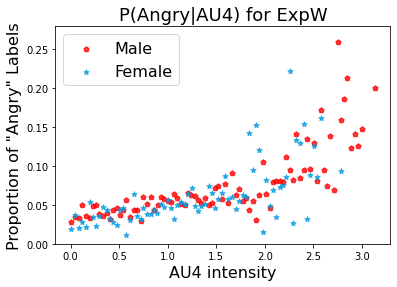

In [31]:
def proportion_calc(intensity_scores, angry, interval_length = 0.05, threshold = 25):
    min_score = min(intensity_scores)
    max_score = max(intensity_scores)
    multiple = math.ceil(max_score / interval_length)
    intensities = []
    proportions = []
    for k in range(multiple):
        interval_floor = k * interval_length
        interval_ceil = (k+1) * interval_length
        if intensity_scores[(intensity_scores >= interval_floor) & (intensity_scores < interval_ceil)].shape[0] >= threshold:
            intensities.append(intensity_scores[(intensity_scores >= interval_floor) & (intensity_scores < interval_ceil)].mean())
            proportions.append(angry[(intensity_scores >= interval_floor) & (intensity_scores < interval_ceil)].mean())
    return (intensities, proportions)

intensities_m, proportions_m = proportion_calc(male_frame.AU04_r, male_frame.Angry, 0.035, 30)
plt.scatter(intensities_m, proportions_m, label="Male", marker = "p", alpha=0.8, s=30, c='r')#,edgecolors='k')

intensities_f, proportions_f = proportion_calc(female_frame.AU04_r, female_frame.Angry, 0.035, 30)
plt.scatter(intensities_f, proportions_f, label="Female", marker = "*", alpha=0.8, s=30, c='#089BDF')#,edgecolors='k')


plt.xlabel('AU4 intensity', fontsize = 16)
plt.ylabel('Proportion of "Angry" Labels', fontsize = 16)
plt.title('P(Angry|AU4) for ExpW', fontsize = 18)
plt.legend(fontsize = 16)
plt.ylim(0, np.max(proportions_m + proportions_f) + 0.02)
plt.savefig('ExpW_AU4.pdf')
plt.show()

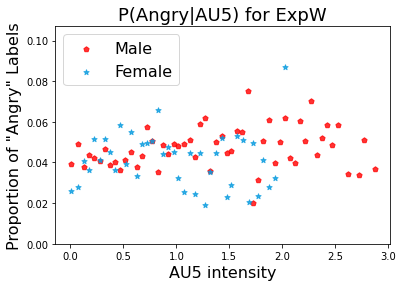

In [34]:
intensities_m, proportions_m = proportion_calc(male_frame.AU05_r, male_frame.Angry, 0.05, 140)
plt.scatter(intensities_m, proportions_m, label="Male", marker = "p", alpha=0.8, s=30, c='r')#,edgecolors='k')

intensities_f, proportions_f = proportion_calc(female_frame.AU05_r, female_frame.Angry, 0.05, 140)
plt.scatter(intensities_f, proportions_f, label="Female", marker = "*", alpha=0.8, s=30, c='#089BDF')#,edgecolors='k')


plt.xlabel('AU5 intensity', fontsize = 16)
plt.ylabel('Proportion of "Angry" Labels', fontsize = 16)
plt.title('P(Angry|AU5) for ExpW', fontsize = 18)
plt.legend(fontsize = 16)
plt.ylim(0, np.max(proportions_m + proportions_f) + 0.02)

plt.savefig('ExpW_AU5.pdf') 
plt.show()

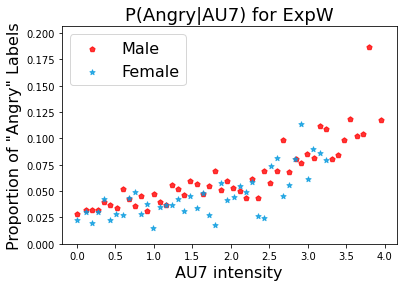

In [55]:
intensities_m, proportions_m = proportion_calc(male_frame.AU07_r, male_frame.Angry, 0.08, 100)
plt.scatter(intensities_m, proportions_m, label="Male", marker = "p", alpha=0.8, s=30, c='r')#,edgecolors='k')

intensities_f, proportions_f = proportion_calc(female_frame.AU07_r, female_frame.Angry, 0.08, 100)
plt.scatter(intensities_f, proportions_f, label="Female", marker = "*", alpha=0.8, s=30, c='#089BDF')#,edgecolors='k')


plt.xlabel('AU7 intensity', fontsize = 16)
plt.ylabel('Proportion of "Angry" Labels', fontsize = 16)
plt.title('P(Angry|AU7) for ExpW', fontsize = 18)
plt.legend(fontsize = 16)
plt.ylim(0, np.max(proportions_m + proportions_f) + 0.02)
plt.savefig('ExpW_AU7.pdf') 
plt.show()

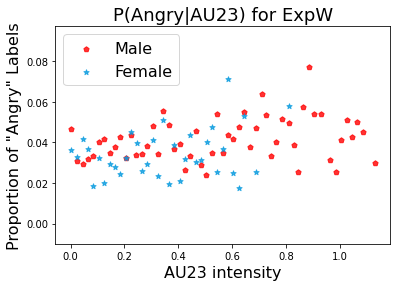

In [78]:
intensities_m, proportions_m = proportion_calc(male_frame.AU23_r, male_frame.Angry, 0.02, 110)
plt.scatter(intensities_m, proportions_m, label="Male", marker = "p", alpha=0.8, s=30, c='r')#,edgecolors='k')

intensities_f, proportions_f = proportion_calc(female_frame.AU23_r, female_frame.Angry, 0.02, 110)
plt.scatter(intensities_f, proportions_f, label="Female", marker = "*", alpha=0.8, s=30, c='#089BDF')#,edgecolors='k')


plt.xlabel('AU23 intensity', fontsize = 16)
plt.ylabel('Proportion of "Angry" Labels', fontsize = 16)
plt.title('P(Angry|AU23) for ExpW', fontsize = 18)
plt.legend(fontsize = 16)
plt.ylim(0 - 0.01, np.max(proportions_m + proportions_f) + 0.02)
plt.savefig('ExpW_AU23.pdf') 
plt.show()

To formally show that there is a significant difference between the two logistic lines, we need logistic regression:

In [79]:
formula = 'Angry ~ AU04_r + AU05_r + AU07_r + AU23_r + gender_preds'
model = smf.glm(formula = formula, data=frame, family=sm.families.Binomial())
result = model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Angry   No. Observations:                85355
Model:                            GLM   Df Residuals:                    85349
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13904.
Date:                Fri, 15 Jan 2021   Deviance:                       27807.
Time:                        20:50:19   Pearson chi2:                 8.52e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -4.0934 

In [80]:
formula = 'Angry ~ (AU04_r + AU05_r + AU07_r + AU23_r) * gender_preds'
model = smf.glm(formula = formula, data=frame, family=sm.families.Binomial())
result = model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Angry   No. Observations:                85355
Model:                            GLM   Df Residuals:                    85345
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13894.
Date:                Fri, 15 Jan 2021   Deviance:                       27788.
Time:                        20:50:19   Pearson chi2:                 8.55e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [81]:
formula = 'Angry ~ I(AU04_r + AU05_r + AU07_r + AU23_r) * gender_preds'
model = smf.glm(formula = formula, data=frame, family=sm.families.Binomial())
result = model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Angry   No. Observations:                85355
Model:                            GLM   Df Residuals:                    85351
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14002.
Date:                Fri, 15 Jan 2021   Deviance:                       28003.
Time:                        20:50:19   Pearson chi2:                 8.55e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                                coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------

# RAF-DB

In [113]:
frame = pd.read_csv('RAFDB_OpenFace_result_with_Emotion_and_Gender.csv')
print(frame.shape)
frame.head()

(12214, 54)


,ImageName,face,confidence,Emotion,Happy,Gender,AU01_c,AU02_c,AU04_c,AU05_c,...,AU05_r_c,AU06_r_c,AU09_r_c,AU10_r_c,AU12_r_c,AU15_r_c,AU17_r_c,AU20_r_c,AU25_r_c,AU26_r_c
0,test_0001_aligned.jpg,0,0.925,5,0,1.0,1.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,test_0002_aligned.jpg,0,0.975,1,0,1.0,1.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
2,test_0004_aligned.jpg,0,0.825,1,0,1.0,0.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,test_0006_aligned.jpg,0,0.875,5,0,1.0,1.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,test_0007_aligned.jpg,0,0.975,3,0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,1,0,1,0,0,0,0


1: Surprise
2: Fear
3: Disgust
4: Happiness
5: Sadness
6: Anger
7: Neutral

In [114]:
frame['Angry'] = frame.Emotion.apply(lambda x: (x == 6)*1)
frame

,ImageName,face,confidence,Emotion,Happy,Gender,AU01_c,AU02_c,AU04_c,AU05_c,...,AU06_r_c,AU09_r_c,AU10_r_c,AU12_r_c,AU15_r_c,AU17_r_c,AU20_r_c,AU25_r_c,AU26_r_c,Angry
0,test_0001_aligned.jpg,0,0.925,5,0,1.0,1.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,test_0002_aligned.jpg,0,0.975,1,0,1.0,1.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
2,test_0004_aligned.jpg,0,0.825,1,0,1.0,0.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,test_0006_aligned.jpg,0,0.875,5,0,1.0,1.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,test_0007_aligned.jpg,0,0.975,3,0,0.0,0.0,0.0,1.0,0.0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12209,train_12266_aligned.jpg,0,0.925,7,0,1.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
12210,train_12267_aligned.jpg,0,0.975,7,0,0.0,0.0,0.0,1.0,0.0,...,0,0,1,0,0,0,0,0,0,0
12211,train_12268_aligned.jpg,0,0.875,7,0,0.0,0.0,1.0,1.0,0.0,...,0,0,0,0,1,0,0,0,0,0
12212,train_12269_aligned.jpg,0,0.975,7,0,1.0,1.0,1.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0


In [115]:
print(list(frame.columns))

['ImageName', 'face', 'confidence', 'Emotion', 'Happy', 'Gender', 'AU01_c', 'AU02_c', 'AU04_c', 'AU05_c', 'AU06_c', 'AU07_c', 'AU09_c', 'AU10_c', 'AU12_c', 'AU14_c', 'AU15_c', 'AU17_c', 'AU20_c', 'AU23_c', 'AU25_c', 'AU26_c', 'AU28_c', 'AU45_c', 'AU01_r', 'AU02_r', 'AU04_r', 'AU05_r', 'AU06_r', 'AU07_r', 'AU09_r', 'AU10_r', 'AU12_r', 'AU14_r', 'AU15_r', 'AU17_r', 'AU20_r', 'AU23_r', 'AU25_r', 'AU26_r', 'AU45_r', 'AU01_r_c', 'AU02_r_c', 'AU04_r_c', 'AU05_r_c', 'AU06_r_c', 'AU09_r_c', 'AU10_r_c', 'AU12_r_c', 'AU15_r_c', 'AU17_r_c', 'AU20_r_c', 'AU25_r_c', 'AU26_r_c', 'Angry']


In [116]:
frame[['AU04_c', 'AU05_c', 'AU07_c', 'AU23_c']].corr()

,AU04_c,AU05_c,AU07_c,AU23_c
AU04_c,1.000000,-0.146897,0.105618,0.032439
AU05_c,-0.146897,1.000000,-0.210382,0.009509
AU07_c,0.105618,-0.210382,1.000000,-0.006216
AU23_c,0.032439,0.009509,-0.006216,1.000000


In [117]:
frame[['AU04_r', 'AU05_r', 'AU07_r', 'AU23_r']].corr()

,AU04_r,AU05_r,AU07_r,AU23_r
AU04_r,1.000000,-0.024118,0.173822,0.000237
AU05_r,-0.024118,1.000000,-0.100290,-0.017668
AU07_r,0.173822,-0.100290,1.000000,0.028291
AU23_r,0.000237,-0.017668,0.028291,1.000000


In [118]:
frame = frame.rename(columns={'Gender': 'gender_preds'})

In [119]:
frame = frame.dropna()
frame.shape

(12214, 55)

In [120]:
frame['AU4_5_7_23_c'] = frame.AU04_c.apply(int).apply(str) + frame.AU05_c.apply(int).apply(str) + frame.AU07_c.apply(int).apply(str) + frame.AU23_c.apply(int).apply(str)
frame.AU4_5_7_23_c.value_counts()

1010    1931
0010    1703
0000    1588
1000    1306
0100     968
1011     876
0011     639
0001     599
1001     583
1100     442
0101     431
0110     419
1110     256
1101     211
0111     159
1111     103
Name: AU4_5_7_23_c, dtype: int64

In [121]:
frame['AU4_5_7_23_r_c'] = frame.AU04_r_c.apply(str) + frame.AU05_r_c.apply(str) + frame.AU07_c.apply(int).apply(str) + frame.AU23_c.apply(int).apply(str)
frame.AU4_5_7_23_r_c.value_counts()

0000    4255
0010    4202
0001    1812
0011    1736
1010     107
1000      49
1011      41
1001      12
Name: AU4_5_7_23_r_c, dtype: int64

# P(expression|AU1, male) =? P(expression|AU1, female)

In [122]:
frame.gender_preds = frame.gender_preds.apply(lambda x: 'Male' if x == 0 else 'Female')
male_frame = frame.loc[frame['gender_preds'] == 'Male']
female_frame = frame.loc[frame['gender_preds'] == 'Female']
print(male_frame.shape)
print(female_frame.shape)

(4936, 57)
(7278, 57)


## Anger

#### First check the simple proportion of male angry vs female angry:

In [123]:
print(male_frame.Angry.mean())
print(female_frame.Angry.mean())

0.09157212317666126
0.030915086562242376


In [124]:
print(male_frame.AU04_r_c.mean())
print(female_frame.AU04_r_c.mean())

0.015802269043760128
0.017999450398461115


In [125]:
print(male_frame.AU05_r_c.mean())
print(female_frame.AU05_r_c.mean())

0.0
0.0


In [126]:
print(male_frame.AU07_c.mean())
print(female_frame.AU07_c.mean())

0.523095623987034
0.4814509480626546


In [127]:
print(male_frame.AU23_c.mean())
print(female_frame.AU23_c.mean())

0.32678282009724474
0.2731519648255015


In [128]:
print((male_frame.AU4_5_7_23_c=='1111').mean())
print((female_frame.AU4_5_7_23_c=='1111').mean())

0.009521880064829822
0.007694421544380325


In [129]:
print(1-(male_frame.AU4_5_7_23_c=='0000').mean())
print(1-(female_frame.AU4_5_7_23_c=='0000').mean())

0.8877633711507293
0.8579280021984061


#### Now check for conditional probability, controlled by AU:

In [135]:
result_df = pd.concat([pd.crosstab(male_frame.AU04_r_c, male_frame.Angry, normalize = 'index')[1], pd.crosstab(female_frame.AU04_r_c, female_frame.Angry, normalize = 'index')[1]], axis=1)
result_df.columns = ['male', 'female']
result_df['diff'] = result_df.female - result_df.male
for index, row in result_df.iterrows():
    cross_tab = pd.crosstab(frame[frame.AU04_r_c == index].gender_preds, frame[frame.AU04_r_c == index].Angry, margins = True)

    cross_tab.columns = ["Not Angry", "Angry", "row_totals"]
    cross_tab.index = ["Female", "Male", "col_totals"]
    observed = cross_tab.iloc[0:2,0:2]   # Get table without totals for later use

    expected =  np.outer(cross_tab["row_totals"][0:2],
                     cross_tab.loc["col_totals"][0:2]) / len(frame[frame.AU04_r_c == index])

    expected = pd.DataFrame(expected)
    expected.columns = ["Not Angry", "Angry"]
    expected.index = ["Female", "Male"]

    if (expected>=5).sum().sum() == 4:
        chi_squared_stat = (((observed-expected)**2)/expected).sum().sum()
        p_value = 1 - stats.chi2.cdf(x=chi_squared_stat, df=1)
    else:
        chi_squared_stat = np.nan
        p_value = np.nan

    print(chi_squared_stat)
    
    result_df.loc[index, "p-value"] = p_value
result_df

190.7265292673058
21.155874941852964


,male,female,diff,p-value
AU04_r_c,,,,
0,0.088308,0.030362,-0.057946,0.000000
1,0.294872,0.061069,-0.233803,0.000004


In [136]:
result_df = pd.concat([pd.crosstab(male_frame.AU05_r_c, male_frame.Angry, normalize = 'index')[1], pd.crosstab(female_frame.AU05_r_c, female_frame.Angry, normalize = 'index')[1]], axis=1)
result_df.columns = ['male', 'female']
result_df['diff'] = result_df.female - result_df.male
for index, row in result_df.iterrows():
    cross_tab = pd.crosstab(frame[frame.AU05_r_c == index].gender_preds, frame[frame.AU05_r_c == index].Angry, margins = True)

    cross_tab.columns = ["Not Angry", "Angry", "row_totals"]
    cross_tab.index = ["Female", "Male", "col_totals"]
    observed = cross_tab.iloc[0:2,0:2]   # Get table without totals for later use

    expected =  np.outer(cross_tab["row_totals"][0:2],
                     cross_tab.loc["col_totals"][0:2]) / len(frame[frame.AU05_r_c == index])

    expected = pd.DataFrame(expected)
    expected.columns = ["Not Angry", "Angry"]
    expected.index = ["Female", "Male"]

    if (expected>=5).sum().sum() == 4:
        chi_squared_stat = (((observed-expected)**2)/expected).sum().sum()
        p_value = 1 - stats.chi2.cdf(x=chi_squared_stat, df=1)
    else:
        chi_squared_stat = np.nan
        p_value = np.nan

    print(chi_squared_stat)
    
    result_df.loc[index, "p-value"] = p_value
result_df

206.6930790590879


,male,female,diff,p-value
AU05_r_c,,,,
0,0.091572,0.030915,-0.060657,0.0


In [132]:
result_df = pd.concat([pd.crosstab(male_frame.AU07_c, male_frame.Angry, normalize = 'index')[1], pd.crosstab(female_frame.AU07_c, female_frame.Angry, normalize = 'index')[1]], axis=1)
result_df.columns = ['male', 'female']
result_df['diff'] = result_df.female - result_df.male
for index, row in result_df.iterrows():
    cross_tab = pd.crosstab(frame[frame.AU07_c == index].gender_preds, frame[frame.AU07_c == index].Angry, margins = True)

    cross_tab.columns = ["Not Angry", "Angry", "row_totals"]
    cross_tab.index = ["Female", "Male", "col_totals"]
    observed = cross_tab.iloc[0:2,0:2]   # Get table without totals for later use

    expected =  np.outer(cross_tab["row_totals"][0:2],
                     cross_tab.loc["col_totals"][0:2]) / len(frame[frame.AU07_c == index])

    expected = pd.DataFrame(expected)
    expected.columns = ["Not Angry", "Angry"]
    expected.index = ["Female", "Male"]

    if (expected>=5).sum().sum() == 4:
        chi_squared_stat = (((observed-expected)**2)/expected).sum().sum()
        p_value = 1 - stats.chi2.cdf(x=chi_squared_stat, df=1)
    else:
        chi_squared_stat = np.nan
        p_value = np.nan

    print(chi_squared_stat)
    
    result_df.loc[index, "p-value"] = p_value
result_df

62.28221686805979
132.11479977060264


,male,female,diff,p-value
AU07_c,,,,
0.0,0.052251,0.016693,-0.035558,2.997602e-15
1.0,0.127421,0.046233,-0.081188,0.000000e+00


In [133]:
result_df = pd.concat([pd.crosstab(male_frame.AU23_c, male_frame.Angry, normalize = 'index')[1], pd.crosstab(female_frame.AU23_c, female_frame.Angry, normalize = 'index')[1]], axis=1)
result_df.columns = ['male', 'female']
result_df['diff'] = result_df.female - result_df.male
for index, row in result_df.iterrows():
    cross_tab = pd.crosstab(frame[frame.AU23_c == index].gender_preds, frame[frame.AU23_c == index].Angry, margins = True)

    cross_tab.columns = ["Not Angry", "Angry", "row_totals"]
    cross_tab.index = ["Female", "Male", "col_totals"]
    observed = cross_tab.iloc[0:2,0:2]   # Get table without totals for later use

    expected =  np.outer(cross_tab["row_totals"][0:2],
                     cross_tab.loc["col_totals"][0:2]) / len(frame[frame.AU23_c == index])

    expected = pd.DataFrame(expected)
    expected.columns = ["Not Angry", "Angry"]
    expected.index = ["Female", "Male"]

    if (expected>=5).sum().sum() == 4:
        chi_squared_stat = (((observed-expected)**2)/expected).sum().sum()
        p_value = 1 - stats.chi2.cdf(x=chi_squared_stat, df=1)
    else:
        chi_squared_stat = np.nan
        p_value = np.nan

    print(chi_squared_stat)
    
    result_df.loc[index, "p-value"] = p_value
result_df

137.36217635298308
66.89541366419873


,male,female,diff,p-value
AU23_c,,,,
0.0,0.088775,0.030624,-0.058151,0.000000e+00
1.0,0.097334,0.031690,-0.065644,3.330669e-16


In [137]:
result_df = pd.concat([pd.crosstab(male_frame.AU4_5_7_23_r_c, male_frame.Angry, normalize = 'index')[1], pd.crosstab(female_frame.AU4_5_7_23_r_c, female_frame.Angry, normalize = 'index')[1]], axis=1)
result_df.columns = ['male', 'female']
result_df['diff'] = result_df.female - result_df.male
for index, row in result_df.iterrows():
    cross_tab = pd.crosstab(frame[frame.AU4_5_7_23_r_c == index].gender_preds, frame[frame.AU4_5_7_23_r_c == index].Angry, margins = True)

    cross_tab.columns = ["Not Angry", "Angry", "row_totals"]
    cross_tab.index = ["Female", "Male", "col_totals"]
    observed = cross_tab.iloc[0:2,0:2]   # Get table without totals for later use

    expected =  np.outer(cross_tab["row_totals"][0:2],
                     cross_tab.loc["col_totals"][0:2]) / len(frame[frame.AU4_5_7_23_r_c == index])

    expected = pd.DataFrame(expected)
    expected.columns = ["Not Angry", "Angry"]
    expected.index = ["Female", "Male"]

    if (expected>=5).sum().sum() == 4:
        chi_squared_stat = (((observed-expected)**2)/expected).sum().sum()
        p_value = 1 - stats.chi2.cdf(x=chi_squared_stat, df=1)
    else:
        chi_squared_stat = np.nan
        p_value = np.nan

    print(chi_squared_stat)
    
    result_df.loc[index, "p-value"] = p_value
result_df

49.80300063588663
13.909131072225987
70.97251495756615
43.5538443428957
nan


ValueError: Length mismatch: Expected axis has 2 elements, new values have 3 elements

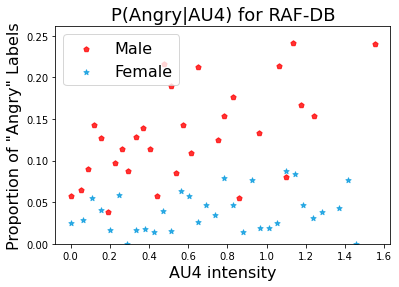

In [163]:
intensities_m, proportions_m = proportion_calc(male_frame.AU04_r, male_frame.Angry, 0.035, 25)
plt.scatter(intensities_m, proportions_m, label="Male", marker = "p", alpha=0.8, s=30, c='r')#,edgecolors='k')

intensities_f, proportions_f = proportion_calc(female_frame.AU04_r, female_frame.Angry, 0.045, 30)
plt.scatter(intensities_f, proportions_f, label="Female", marker = "*", alpha=0.8, s=30, c='#089BDF')#,edgecolors='k')


plt.xlabel('AU4 intensity', fontsize = 16)
plt.ylabel('Proportion of "Angry" Labels', fontsize = 16)
plt.title('P(Angry|AU4) for RAF-DB', fontsize = 18)
plt.legend(fontsize = 16)
plt.ylim(0, np.max(proportions_m + proportions_f) + 0.02)
plt.savefig('RAFDB_AU4.pdf')
plt.show()

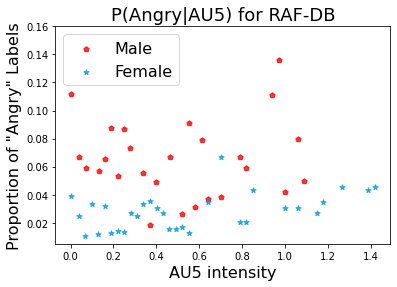

In [250]:
intensities_m, proportions_m = proportion_calc(male_frame.AU05_r, male_frame.Angry, 0.03, 20)
plt.scatter(intensities_m, proportions_m, label="Male", marker = "p", alpha=0.8, s=30, c='r')#,edgecolors='k')

intensities_f, proportions_f = proportion_calc(female_frame.AU05_r, female_frame.Angry, 0.03, 20)
plt.scatter(intensities_f, proportions_f, label="Female", marker = "*", alpha=0.8, s=30, c='#089BDF')#,edgecolors='k')


plt.xlabel('AU5 intensity', fontsize = 16)
plt.ylabel('Proportion of "Angry" Labels', fontsize = 16)
plt.title('P(Angry|AU5) for RAF-DB', fontsize = 18)
plt.legend(fontsize = 16)
plt.ylim(0.005, 0.16)
plt.savefig('RAFDB_AU5.pdf') 
plt.show()

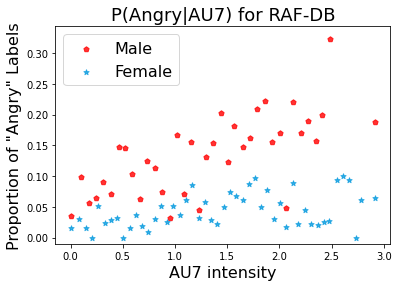

In [277]:
intensities_m, proportions_m = proportion_calc(male_frame.AU07_r, male_frame.Angry, 0.07, 30)
plt.scatter(intensities_m, proportions_m, label="Male", marker = "p", alpha=0.8, s=30, c='r')#,edgecolors='k')

intensities_f, proportions_f = proportion_calc(female_frame.AU07_r, female_frame.Angry, 0.06, 30)
plt.scatter(intensities_f, proportions_f, label="Female", marker = "*", alpha=0.8, s=30, c='#089BDF')#,edgecolors='k')


plt.xlabel('AU7 intensity', fontsize = 16)
plt.ylabel('Proportion of "Angry" Labels', fontsize = 16)
plt.title('P(Angry|AU7) for RAF-DB', fontsize = 18)
plt.legend(fontsize = 16)
plt.ylim(-0.01, np.max(proportions_m + proportions_f) + 0.02)
plt.savefig('RAFDB_AU7.pdf') 
plt.show()

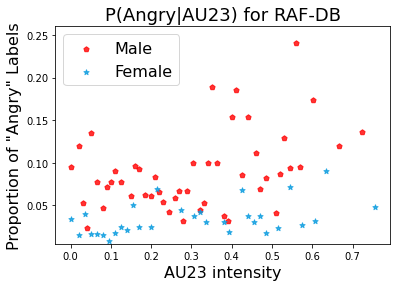

In [312]:
intensities_m, proportions_m = proportion_calc(male_frame.AU23_r, male_frame.Angry, 0.012, 20)
plt.scatter(intensities_m, proportions_m, label="Male", marker = "p", alpha=0.8, s=30, c='r')#,edgecolors='k')

intensities_f, proportions_f = proportion_calc(female_frame.AU23_r, female_frame.Angry, 0.015, 20)
plt.scatter(intensities_f, proportions_f, label="Female", marker = "*", alpha=0.8, s=30, c='#089BDF')#,edgecolors='k')


plt.xlabel('AU23 intensity', fontsize = 16)
plt.ylabel('Proportion of "Angry" Labels', fontsize = 16)
plt.title('P(Angry|AU23) for RAF-DB', fontsize = 18)
plt.legend(fontsize = 16)
plt.ylim(0.005, np.max(proportions_m + proportions_f) + 0.02)
plt.savefig('RAFDB_AU23.pdf') 
plt.show()

To formally show that there is a significant difference between the two logistic lines, we need logistic regression:

In [313]:
formula = 'Angry ~ AU04_r + AU05_r + AU07_r + AU23_r + gender_preds'
model = smf.glm(formula = formula, data=frame, family=sm.families.Binomial())
result = model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Angry   No. Observations:                12214
Model:                            GLM   Df Residuals:                    12208
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2353.4
Date:                Fri, 15 Jan 2021   Deviance:                       4706.8
Time:                        21:32:21   Pearson chi2:                 1.27e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -3.9637 

In [314]:
formula = 'Angry ~ (AU04_r + AU05_r + AU07_r + AU23_r) * gender_preds'
model = smf.glm(formula = formula, data=frame, family=sm.families.Binomial())
result = model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Angry   No. Observations:                12214
Model:                            GLM   Df Residuals:                    12204
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2345.9
Date:                Fri, 15 Jan 2021   Deviance:                       4691.9
Time:                        21:32:21   Pearson chi2:                 1.20e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [315]:
formula = 'Angry ~ I(AU04_r + AU05_r + AU07_r + AU23_r) * gender_preds'
model = smf.glm(formula = formula, data=frame, family=sm.families.Binomial())
result = model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Angry   No. Observations:                12214
Model:                            GLM   Df Residuals:                    12210
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2421.1
Date:                Fri, 15 Jan 2021   Deviance:                       4842.1
Time:                        21:32:22   Pearson chi2:                 1.20e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                                coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------

# AffectNet Manual

In [316]:
frame = pd.read_csv('AffectNet_Manual_OpenFace_result_with_expression_gender_race_age.csv')
print(frame.shape)
frame.head()

(35694, 59)


,ImageName,Expression,Happy,race_preds,gender_preds,age_preds,race_scores,gender_scores,age_scores,face,...,AU05_r_c,AU06_r_c,AU09_r_c,AU10_r_c,AU12_r_c,AU15_r_c,AU17_r_c,AU20_r_c,AU25_r_c,AU26_r_c
0,0002074f0d5dafbb7983d509964312d04c612d9d425577...,10,0,White,Female,60-69,[0.425075 0.02112318 0.25978056 0.00382649 0...,[0.09870926 0.9012907 ],[5.3278323e-05 5.1294203e-04 3.1685282e-03 2.4...,0,...,0,0,0,1,0,0,0,0,1,0
1,000bdb0a8f54725d1424bb38d626b1d8bf17f001ad2406...,8,0,Black,Male,20-29,[3.52906886e-06 9.99552011e-01 1.59864125e-04 ...,[9.9954259e-01 4.5739944e-04],[5.6344652e-07 4.1122996e-05 1.3004625e-02 6.6...,0,...,0,1,0,1,1,0,0,0,1,0
2,000c10a8f6735212d71eb54298bc47ea56dc08e64ed2ca...,0,0,White,Male,40-49,[9.3397456e-01 4.9433287e-04 3.7014667e-02 4.5...,[0.99797386 0.00202617],[8.6898144e-05 1.5486187e-04 2.0614783e-03 2.4...,0,...,0,0,0,1,0,0,0,0,0,0
3,000fb19bfc2f4d09e33b30ae5d1be4488297e7ff6f0011...,1,1,White,Male,40-49,[9.3484497e-01 2.3674322e-05 1.4515205e-02 1.9...,[9.9999887e-01 1.1556698e-06],[3.4171117e-06 7.4146001e-06 5.2725355e-04 4.3...,0,...,0,0,0,1,1,0,0,0,0,0
4,0010aaaebcdd6bae8f967dc0e471760f7a45e220125be3...,1,1,Middle Eastern,Male,20-29,[4.4076398e-02 7.8236350e-05 4.0029038e-02 3.7...,[9.9999958e-01 3.9027404e-07],[5.4735474e-06 8.7598469e-03 4.4977888e-01 4.5...,0,...,0,1,0,1,1,0,0,0,1,0


In [317]:
frame['Angry'] = (frame.Expression == 6).astype(int)

In [318]:
print(list(frame.columns))

['ImageName', 'Expression', 'Happy', 'race_preds', 'gender_preds', 'age_preds', 'race_scores', 'gender_scores', 'age_scores', 'face', 'confidence', 'AU01_c', 'AU02_c', 'AU04_c', 'AU05_c', 'AU06_c', 'AU07_c', 'AU09_c', 'AU10_c', 'AU12_c', 'AU14_c', 'AU15_c', 'AU17_c', 'AU20_c', 'AU23_c', 'AU25_c', 'AU26_c', 'AU28_c', 'AU45_c', 'AU01_r', 'AU02_r', 'AU04_r', 'AU05_r', 'AU06_r', 'AU07_r', 'AU09_r', 'AU10_r', 'AU12_r', 'AU14_r', 'AU15_r', 'AU17_r', 'AU20_r', 'AU23_r', 'AU25_r', 'AU26_r', 'AU45_r', 'AU01_r_c', 'AU02_r_c', 'AU04_r_c', 'AU05_r_c', 'AU06_r_c', 'AU09_r_c', 'AU10_r_c', 'AU12_r_c', 'AU15_r_c', 'AU17_r_c', 'AU20_r_c', 'AU25_r_c', 'AU26_r_c', 'Angry']


In [319]:
frame[['AU04_c', 'AU05_c', 'AU07_c', 'AU23_c']].corr()

,AU04_c,AU05_c,AU07_c,AU23_c
AU04_c,1.000000,-0.117411,0.093733,0.052718
AU05_c,-0.117411,1.000000,-0.187858,-0.038041
AU07_c,0.093733,-0.187858,1.000000,0.060821
AU23_c,0.052718,-0.038041,0.060821,1.000000


In [320]:
frame[['AU04_r', 'AU05_r', 'AU07_r', 'AU23_r']].corr()

,AU04_r,AU05_r,AU07_r,AU23_r
AU04_r,1.000000,-0.051493,0.169017,0.074674
AU05_r,-0.051493,1.000000,-0.229670,0.007527
AU07_r,0.169017,-0.229670,1.000000,0.105698
AU23_r,0.074674,0.007527,0.105698,1.000000


In [321]:
frame = frame.dropna()
frame.shape

(35694, 60)

In [322]:
frame['AU4_5_7_23_c'] = frame.AU04_c.apply(int).apply(str) + frame.AU05_c.apply(int).apply(str) + frame.AU07_c.apply(int).apply(str) + frame.AU23_c.apply(int).apply(str)
frame.AU4_5_7_23_c.value_counts()

0000    5899
0010    5403
0100    4992
1010    3767
1000    3111
0110    2124
0011    1703
1100    1594
1011    1486
0001    1401
0101    1110
1110     930
1001     897
0111     521
1101     431
1111     325
Name: AU4_5_7_23_c, dtype: int64

In [323]:
frame['AU4_5_7_23_r_c'] = frame.AU04_r_c.apply(str) + frame.AU05_r_c.apply(str) + frame.AU07_c.apply(int).apply(str) + frame.AU23_c.apply(int).apply(str)
frame.AU4_5_7_23_r_c.value_counts()

0000    15201
0010    11728
0011     3840
0001     3727
1010      480
1000      247
1011      190
0100      145
1001       80
0101       32
0110       16
0111        5
1100        3
Name: AU4_5_7_23_r_c, dtype: int64

# P(expression|AU1, male) =? P(expression|AU1, female)

In [324]:
male_frame = frame.loc[frame['gender_preds'] == 'Male']
female_frame = frame.loc[frame['gender_preds'] == 'Female']
print(male_frame.shape)
print(female_frame.shape)

(19926, 62)
(15768, 62)


## Anger

#### First check the simple proportion of male angry vs female angry:

In [325]:
print(male_frame.Angry.mean())
print(female_frame.Angry.mean())

0.09033423667570009
0.03748097412480974


In [326]:
print(male_frame.AU04_r_c.mean())
print(female_frame.AU04_r_c.mean())

0.034076081501555756
0.020357686453576863


In [327]:
print(male_frame.AU05_r_c.mean())
print(female_frame.AU05_r_c.mean())

0.005068754391247616
0.006341958396752917


In [328]:
print(male_frame.AU07_c.mean())
print(female_frame.AU07_c.mean())

0.4669778179263274
0.4410197869101979


In [329]:
print(male_frame.AU23_c.mean())
print(female_frame.AU23_c.mean())

0.2800361336946703
0.14548452562151193


In [330]:
print((male_frame.AU4_5_7_23_c=='1111').mean())
print((female_frame.AU4_5_7_23_c=='1111').mean())

0.011693265080798956
0.005834601725012684


In [331]:
print(1-(male_frame.AU4_5_7_23_c=='0000').mean())
print(1-(female_frame.AU4_5_7_23_c=='0000').mean())

0.853809093646492
0.8106291222729579


#### Now check for conditional probability, controlled by AU:

In [337]:
result_df = pd.concat([pd.crosstab(male_frame.AU04_r_c, male_frame.Angry, normalize = 'index')[1], pd.crosstab(female_frame.AU04_r_c, female_frame.Angry, normalize = 'index')[1]], axis=1)
result_df.columns = ['male', 'female']
result_df['diff'] = result_df.female - result_df.male
for index, row in result_df.iterrows():
    cross_tab = pd.crosstab(frame[frame.AU04_r_c == index].gender_preds, frame[frame.AU04_r_c == index].Angry, margins = True)

    cross_tab.columns = ["Not Angry", "Angry", "row_totals"]
    cross_tab.index = ["Female", "Male", "col_totals"]
    observed = cross_tab.iloc[0:2,0:2]   # Get table without totals for later use

    expected =  np.outer(cross_tab["row_totals"][0:2],
                     cross_tab.loc["col_totals"][0:2]) / len(frame[frame.AU04_r_c == index])

    expected = pd.DataFrame(expected)
    expected.columns = ["Not Angry", "Angry"]
    expected.index = ["Female", "Male"]

    if (expected>=5).sum().sum() == 4:
        chi_squared_stat = (((observed-expected)**2)/expected).sum().sum()
        p_value = 1 - stats.chi2.cdf(x=chi_squared_stat, df=1)
    else:
        chi_squared_stat = np.nan
        p_value = np.nan

    print(chi_squared_stat)
    
    result_df.loc[index, "p-value"] = p_value
result_df

330.6218414959559
37.592285092914096


,male,female,diff,p-value
AU04_r_c,,,,
0,0.083390,0.035929,-0.047460,0.000000e+00
1,0.287187,0.112150,-0.175038,8.718865e-10


In [338]:
result_df = pd.concat([pd.crosstab(male_frame.AU05_r_c, male_frame.Angry, normalize = 'index')[1], pd.crosstab(female_frame.AU05_r_c, female_frame.Angry, normalize = 'index')[1]], axis=1)
result_df.columns = ['male', 'female']
result_df['diff'] = result_df.female - result_df.male
for index, row in result_df.iterrows():
    cross_tab = pd.crosstab(frame[frame.AU05_r_c == index].gender_preds, frame[frame.AU05_r_c == index].Angry, margins = True)

    cross_tab.columns = ["Not Angry", "Angry", "row_totals"]
    cross_tab.index = ["Female", "Male", "col_totals"]
    observed = cross_tab.iloc[0:2,0:2]   # Get table without totals for later use

    expected =  np.outer(cross_tab["row_totals"][0:2],
                     cross_tab.loc["col_totals"][0:2]) / len(frame[frame.AU05_r_c == index])

    expected = pd.DataFrame(expected)
    expected.columns = ["Not Angry", "Angry"]
    expected.index = ["Female", "Male"]

    if (expected>=5).sum().sum() == 4:
        chi_squared_stat = (((observed-expected)**2)/expected).sum().sum()
        p_value = 1 - stats.chi2.cdf(x=chi_squared_stat, df=1)
    else:
        chi_squared_stat = np.nan
        p_value = np.nan

    print(chi_squared_stat)
    
    result_df.loc[index, "p-value"] = p_value
result_df

393.29330128646114
nan


,male,female,diff,p-value
AU05_r_c,,,,
0,0.090593,0.037529,-0.053064,0.0
1,0.039604,0.030000,-0.009604,NaN


In [334]:
result_df = pd.concat([pd.crosstab(male_frame.AU07_c, male_frame.Angry, normalize = 'index')[1], pd.crosstab(female_frame.AU07_c, female_frame.Angry, normalize = 'index')[1]], axis=1)
result_df.columns = ['male', 'female']
result_df['diff'] = result_df.female - result_df.male
for index, row in result_df.iterrows():
    cross_tab = pd.crosstab(frame[frame.AU07_c == index].gender_preds, frame[frame.AU07_c == index].Angry, margins = True)

    cross_tab.columns = ["Not Angry", "Angry", "row_totals"]
    cross_tab.index = ["Female", "Male", "col_totals"]
    observed = cross_tab.iloc[0:2,0:2]   # Get table without totals for later use

    expected =  np.outer(cross_tab["row_totals"][0:2],
                     cross_tab.loc["col_totals"][0:2]) / len(frame[frame.AU07_c == index])

    expected = pd.DataFrame(expected)
    expected.columns = ["Not Angry", "Angry"]
    expected.index = ["Female", "Male"]

    if (expected>=5).sum().sum() == 4:
        chi_squared_stat = (((observed-expected)**2)/expected).sum().sum()
        p_value = 1 - stats.chi2.cdf(x=chi_squared_stat, df=1)
    else:
        chi_squared_stat = np.nan
        p_value = np.nan

    print(chi_squared_stat)
    
    result_df.loc[index, "p-value"] = p_value
result_df

210.71417608965712
181.2485676236347


,male,female,diff,p-value
AU07_c,,,,
0.0,0.088127,0.036646,-0.051481,0.0
1.0,0.092853,0.038539,-0.054314,0.0


In [335]:
result_df = pd.concat([pd.crosstab(male_frame.AU23_c, male_frame.Angry, normalize = 'index')[1], pd.crosstab(female_frame.AU23_c, female_frame.Angry, normalize = 'index')[1]], axis=1)
result_df.columns = ['male', 'female']
result_df['diff'] = result_df.female - result_df.male
for index, row in result_df.iterrows():
    cross_tab = pd.crosstab(frame[frame.AU23_c == index].gender_preds, frame[frame.AU23_c == index].Angry, margins = True)

    cross_tab.columns = ["Not Angry", "Angry", "row_totals"]
    cross_tab.index = ["Female", "Male", "col_totals"]
    observed = cross_tab.iloc[0:2,0:2]   # Get table without totals for later use

    expected =  np.outer(cross_tab["row_totals"][0:2],
                     cross_tab.loc["col_totals"][0:2]) / len(frame[frame.AU23_c == index])

    expected = pd.DataFrame(expected)
    expected.columns = ["Not Angry", "Angry"]
    expected.index = ["Female", "Male"]

    if (expected>=5).sum().sum() == 4:
        chi_squared_stat = (((observed-expected)**2)/expected).sum().sum()
        p_value = 1 - stats.chi2.cdf(x=chi_squared_stat, df=1)
    else:
        chi_squared_stat = np.nan
        p_value = np.nan

    print(chi_squared_stat)
    
    result_df.loc[index, "p-value"] = p_value
result_df

336.7921087131107
56.93326054563457


,male,female,diff,p-value
AU23_c,,,,
0.0,0.091872,0.037405,-0.054467,0.000000e+00
1.0,0.086380,0.037925,-0.048455,4.507505e-14


In [339]:
result_df = pd.concat([pd.crosstab(male_frame.AU4_5_7_23_r_c, male_frame.Angry, normalize = 'index')[1], pd.crosstab(female_frame.AU4_5_7_23_r_c, female_frame.Angry, normalize = 'index')[1]], axis=1)
result_df.columns = ['male', 'female']
result_df['diff'] = result_df.female - result_df.male
for index, row in result_df.iterrows():
    cross_tab = pd.crosstab(frame[frame.AU4_5_7_23_r_c == index].gender_preds, frame[frame.AU4_5_7_23_r_c == index].Angry, margins = True)

    cross_tab.columns = ["Not Angry", "Angry", "row_totals"]
    cross_tab.index = ["Female", "Male", "col_totals"]
    observed = cross_tab.iloc[0:2,0:2]   # Get table without totals for later use

    expected =  np.outer(cross_tab["row_totals"][0:2],
                     cross_tab.loc["col_totals"][0:2]) / len(frame[frame.AU4_5_7_23_r_c == index])

    expected = pd.DataFrame(expected)
    expected.columns = ["Not Angry", "Angry"]
    expected.index = ["Female", "Male"]

    if (expected>=5).sum().sum() == 4:
        chi_squared_stat = (((observed-expected)**2)/expected).sum().sum()
        p_value = 1 - stats.chi2.cdf(x=chi_squared_stat, df=1)
    else:
        chi_squared_stat = np.nan
        p_value = np.nan

    print(chi_squared_stat)
    
    result_df.loc[index, "p-value"] = p_value
result_df

160.29591499166813
35.265231622319995
127.82143664263744
13.137723410765107
nan
nan


ValueError: Length mismatch: Expected axis has 2 elements, new values have 3 elements

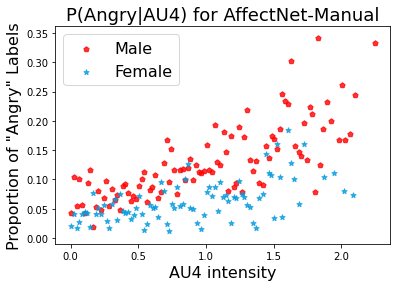

In [353]:
intensities_m, proportions_m = proportion_calc(male_frame.AU04_r, male_frame.Angry, 0.02, 35)
plt.scatter(intensities_m, proportions_m, label="Male", marker = "p", alpha=0.8, s=30, c='r')#,edgecolors='k')

intensities_f, proportions_f = proportion_calc(female_frame.AU04_r, female_frame.Angry, 0.02, 25)
plt.scatter(intensities_f, proportions_f, label="Female", marker = "*", alpha=0.8, s=30, c='#089BDF')#,edgecolors='k')


plt.xlabel('AU4 intensity', fontsize = 16)
plt.ylabel('Proportion of "Angry" Labels', fontsize = 16)
plt.title('P(Angry|AU4) for AffectNet-Manual', fontsize = 18)
plt.legend(fontsize = 16)
plt.ylim(0 - 0.01, np.max(proportions_m + proportions_f) + 0.02)
plt.savefig('AffectNet_Manual_AU4.pdf') 
plt.show()

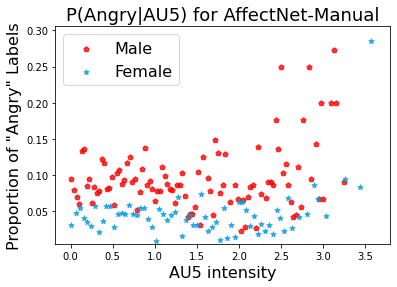

In [402]:
intensities_m, proportions_m = proportion_calc(male_frame.AU05_r, male_frame.Angry, 0.03, 10)
plt.scatter(intensities_m, proportions_m, label="Male", marker = "p", alpha=0.8, s=30, c='r')#,edgecolors='k')

intensities_f, proportions_f = proportion_calc(female_frame.AU05_r, female_frame.Angry, 0.045, 12)
plt.scatter(intensities_f, proportions_f, label="Female", marker = "*", alpha=0.8, s=30, c='#089BDF')#,edgecolors='k')


plt.xlabel('AU5 intensity', fontsize = 16)
plt.ylabel('Proportion of "Angry" Labels', fontsize = 16)
plt.title('P(Angry|AU5) for AffectNet-Manual', fontsize = 18)
plt.legend(fontsize = 16)
plt.ylim(0.005, np.max(proportions_m + proportions_f) + 0.02)
plt.savefig('AffectNet_Manual_AU5.pdf') 
plt.show()

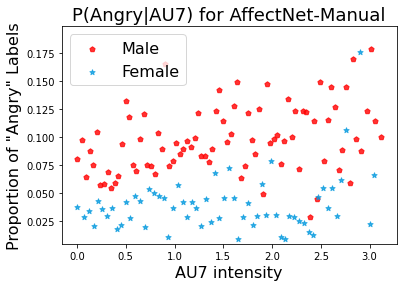

In [472]:
intensities_m, proportions_m = proportion_calc(male_frame.AU07_r, male_frame.Angry, 0.037, 50)
plt.scatter(intensities_m, proportions_m, label="Male", marker = "p", alpha=0.8, s=30, c='r')#,edgecolors='k')

intensities_f, proportions_f = proportion_calc(female_frame.AU07_r, female_frame.Angry, 0.048, 45)
plt.scatter(intensities_f, proportions_f, label="Female", marker = "*", alpha=0.8, s=30, c='#089BDF')#,edgecolors='k')


plt.xlabel('AU7 intensity', fontsize = 16)
plt.ylabel('Proportion of "Angry" Labels', fontsize = 16)
plt.title('P(Angry|AU7) for AffectNet-Manual', fontsize = 18)
plt.legend(fontsize = 16)
plt.ylim(0.005, np.max(proportions_m + proportions_f) + 0.02)
plt.savefig('AffectNet_Manual_AU7.pdf') 
plt.show()

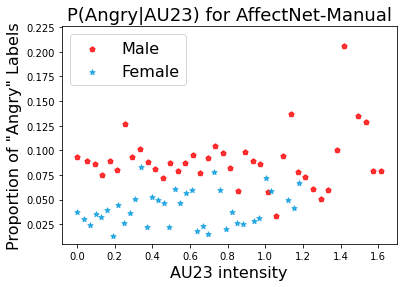

In [508]:
intensities_m, proportions_m = proportion_calc(male_frame.AU23_r, male_frame.Angry, 0.04, 30)
plt.scatter(intensities_m, proportions_m, label="Male", marker = "p", alpha=0.8, s=30, c='r')#,edgecolors='k')

intensities_f, proportions_f = proportion_calc(female_frame.AU23_r, female_frame.Angry, 0.03, 15)
plt.scatter(intensities_f, proportions_f, label="Female", marker = "*", alpha=0.8, s=30, c='#089BDF')#,edgecolors='k')


plt.xlabel('AU23 intensity', fontsize = 16)
plt.ylabel('Proportion of "Angry" Labels', fontsize = 16)
plt.title('P(Angry|AU23) for AffectNet-Manual', fontsize = 18)
plt.legend(fontsize = 16)
plt.ylim(0.005, np.max(proportions_m + proportions_f) + 0.02)
plt.savefig('AffectNet_Manual_AU23.pdf') 
plt.show()

##### To formally show that there is a significant difference between the two logistic lines, we need logistic regression:

In [509]:
formula = 'Angry ~ AU04_r + AU05_r + AU07_r + AU23_r + gender_preds'
model = smf.glm(formula = formula, data=frame, family=sm.families.Binomial())
result = model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Angry   No. Observations:                35694
Model:                            GLM   Df Residuals:                    35688
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8077.4
Date:                Sat, 16 Jan 2021   Deviance:                       16155.
Time:                        23:58:34   Pearson chi2:                 3.50e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -3.6006 

In [510]:
formula = 'Angry ~ (AU04_r + AU05_r + AU07_r + AU23_r) * gender_preds'
model = smf.glm(formula = formula, data=frame, family=sm.families.Binomial())
result = model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Angry   No. Observations:                35694
Model:                            GLM   Df Residuals:                    35684
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8073.7
Date:                Sat, 16 Jan 2021   Deviance:                       16147.
Time:                        23:58:37   Pearson chi2:                 3.48e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [511]:
formula = 'Angry ~ I(AU04_r + AU05_r + AU07_r + AU23_r) * gender_preds'
model = smf.glm(formula = formula, data=frame, family=sm.families.Binomial())
result = model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Angry   No. Observations:                35694
Model:                            GLM   Df Residuals:                    35690
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8411.5
Date:                Sat, 16 Jan 2021   Deviance:                       16823.
Time:                        23:58:39   Pearson chi2:                 3.57e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                                                coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------

# AffectNet Automatic

In [512]:
frame = pd.read_csv('AffectNet_Automatic_OpenFace_result_with_expression_gender_race_age.csv')
print(frame.shape)
frame.head()

(42284, 59)


,ImageName,Expression,Happy,race_preds,gender_preds,age_preds,race_scores,gender_scores,age_scores,face,...,AU05_r_c,AU06_r_c,AU09_r_c,AU10_r_c,AU12_r_c,AU15_r_c,AU17_r_c,AU20_r_c,AU25_r_c,AU26_r_c
0,0000278c7363d43c42a4db994a51e36aad351f55e77680...,10,0,White,Female,40-49,[9.7449505e-01 5.2814976e-06 5.5093807e-03 4.6...,[7.1670633e-04 9.9928331e-01],[2.2580596e-07 1.7767234e-06 2.0319392e-04 2.8...,0,...,0,0,0,1,0,0,0,0,1,0
1,0000fa4e4ffdc2a6042a0eadf8a2d067774705ba17721a...,10,0,East Asian,Female,20-29,[1.9185199e-01 7.3396941e-06 1.9742842e-03 7.8...,[6.5521155e-05 9.9993443e-01],[1.48235313e-06 3.44420609e-04 2.11575143e-02 ...,0,...,0,0,0,0,0,0,0,0,1,0
2,00017248a05758584faf54d4ccdb23d5365a5bfc3e3aee...,0,0,Black,Female,30-39,[2.06290515e-05 9.99178529e-01 1.19858145e-04 ...,[0.00982992 0.9901701 ],[1.80382315e-07 2.75580824e-05 3.95781221e-03 ...,0,...,0,0,0,0,0,0,0,0,0,0
3,000364dc26143c95e73e8dca30c0f3730db84c295c0b48...,1,1,East Asian,Female,20-29,[9.0016201e-03 2.3799853e-06 2.5050717e-03 9.5...,[6.7393144e-06 9.9999321e-01],[1.0476051e-07 6.7055156e-04 1.7963018e-01 8.1...,0,...,0,0,0,0,1,0,0,0,0,0
4,0003a7c1e380e87c864436434115f656c92b695e384f88...,10,0,White,Female,20-29,[0.60690844 0.01389638 0.2529639 0.00064708 0...,[0.00108382 0.9989162 ],[9.6977169e-07 3.5300865e-04 4.1254394e-02 6.1...,0,...,0,0,0,1,0,1,0,0,0,0


In [513]:
frame['Angry'] = (frame.Expression == 6).astype(int)

In [514]:
print(list(frame.columns))

['ImageName', 'Expression', 'Happy', 'race_preds', 'gender_preds', 'age_preds', 'race_scores', 'gender_scores', 'age_scores', 'face', 'confidence', 'AU01_c', 'AU02_c', 'AU04_c', 'AU05_c', 'AU06_c', 'AU07_c', 'AU09_c', 'AU10_c', 'AU12_c', 'AU14_c', 'AU15_c', 'AU17_c', 'AU20_c', 'AU23_c', 'AU25_c', 'AU26_c', 'AU28_c', 'AU45_c', 'AU01_r', 'AU02_r', 'AU04_r', 'AU05_r', 'AU06_r', 'AU07_r', 'AU09_r', 'AU10_r', 'AU12_r', 'AU14_r', 'AU15_r', 'AU17_r', 'AU20_r', 'AU23_r', 'AU25_r', 'AU26_r', 'AU45_r', 'AU01_r_c', 'AU02_r_c', 'AU04_r_c', 'AU05_r_c', 'AU06_r_c', 'AU09_r_c', 'AU10_r_c', 'AU12_r_c', 'AU15_r_c', 'AU17_r_c', 'AU20_r_c', 'AU25_r_c', 'AU26_r_c', 'Angry']


In [515]:
frame[['AU04_c', 'AU05_c', 'AU07_c', 'AU23_c']].corr()

,AU04_c,AU05_c,AU07_c,AU23_c
AU04_c,1.000000,-0.146116,0.102863,0.061244
AU05_c,-0.146116,1.000000,-0.196551,-0.023305
AU07_c,0.102863,-0.196551,1.000000,0.039128
AU23_c,0.061244,-0.023305,0.039128,1.000000


In [516]:
frame[['AU04_r', 'AU05_r', 'AU07_r', 'AU23_r']].corr()

,AU04_r,AU05_r,AU07_r,AU23_r
AU04_r,1.000000,-0.064445,0.195296,0.074951
AU05_r,-0.064445,1.000000,-0.232259,-0.004323
AU07_r,0.195296,-0.232259,1.000000,0.103231
AU23_r,0.074951,-0.004323,0.103231,1.000000


In [517]:
frame = frame.dropna()
frame.shape

(42284, 60)

In [518]:
frame['AU4_5_7_23_c'] = frame.AU04_c.apply(int).apply(str) + frame.AU05_c.apply(int).apply(str) + frame.AU07_c.apply(int).apply(str) + frame.AU23_c.apply(int).apply(str)
frame.AU4_5_7_23_c.value_counts()

0000    6754
0100    6714
0010    6159
1010    4198
1000    3557
0110    2635
1100    1846
0011    1697
0001    1660
1011    1650
0101    1596
1001    1103
1110    1084
0111     703
1101     552
1111     376
Name: AU4_5_7_23_c, dtype: int64

In [519]:
frame['AU4_5_7_23_r_c'] = frame.AU04_r_c.apply(str) + frame.AU05_r_c.apply(str) + frame.AU07_c.apply(int).apply(str) + frame.AU23_c.apply(int).apply(str)
frame.AU4_5_7_23_r_c.value_counts()

0000    18407
0010    13524
0001     4792
0011     4220
1010      526
0100      234
1000      228
1011      200
1001       65
0101       54
0110       25
0111        6
1100        2
1110        1
Name: AU4_5_7_23_r_c, dtype: int64

# P(expression|AU1, male) =? P(expression|AU1, female)

In [520]:
male_frame = frame.loc[frame['gender_preds'] == 'Male']
female_frame = frame.loc[frame['gender_preds'] == 'Female']
print(male_frame.shape)
print(female_frame.shape)

(22062, 62)
(20222, 62)


## Anger

#### First check the simple proportion of male angry vs female angry:

In [521]:
print(male_frame.Angry.mean())
print(female_frame.Angry.mean())

0.09282929924757502
0.020818910097913163


In [522]:
print(male_frame.AU04_r_c.mean())
print(female_frame.AU04_r_c.mean())

0.028691868370954582
0.019236475126100286


In [523]:
print(male_frame.AU05_r_c.mean())
print(female_frame.AU05_r_c.mean())

0.006164445653159279
0.009197903273662348


In [524]:
print(male_frame.AU07_c.mean())
print(female_frame.AU07_c.mean())

0.43232707823406763
0.44327959647908216


In [525]:
print(male_frame.AU23_c.mean())
print(female_frame.AU23_c.mean())

0.27381923669658237
0.16299080209672634


In [526]:
print((male_frame.AU4_5_7_23_c=='1111').mean())
print((female_frame.AU4_5_7_23_c=='1111').mean())

0.011331701568307498
0.006230837701513204


In [527]:
print(1-(male_frame.AU4_5_7_23_c=='0000').mean())
print(1-(female_frame.AU4_5_7_23_c=='0000').mean())

0.8492883691415103
0.8304322025516764


#### Now check for conditional probability, controlled by AU:

In [533]:
result_df = pd.concat([pd.crosstab(male_frame.AU04_r_c, male_frame.Angry, normalize = 'index')[1], pd.crosstab(female_frame.AU04_r_c, female_frame.Angry, normalize = 'index')[1]], axis=1)
result_df.columns = ['male', 'female']
result_df['diff'] = result_df.female - result_df.male
for index, row in result_df.iterrows():
    cross_tab = pd.crosstab(frame[frame.AU04_r_c == index].gender_preds, frame[frame.AU04_r_c == index].Angry, margins = True)

    cross_tab.columns = ["Not Angry", "Angry", "row_totals"]
    cross_tab.index = ["Female", "Male", "col_totals"]
    observed = cross_tab.iloc[0:2,0:2]   # Get table without totals for later use

    expected =  np.outer(cross_tab["row_totals"][0:2],
                     cross_tab.loc["col_totals"][0:2]) / len(frame[frame.AU04_r_c == index])

    expected = pd.DataFrame(expected)
    expected.columns = ["Not Angry", "Angry"]
    expected.index = ["Female", "Male"]

    if (expected>=5).sum().sum() == 4:
        chi_squared_stat = (((observed-expected)**2)/expected).sum().sum()
        p_value = 1 - stats.chi2.cdf(x=chi_squared_stat, df=1)
    else:
        chi_squared_stat = np.nan
        p_value = np.nan

    print(chi_squared_stat)
    
    result_df.loc[index, "p-value"] = p_value
result_df

883.5636194934368
78.95528925292228


,male,female,diff,p-value
AU04_r_c,,,,
0,0.084512,0.018908,-0.065604,0.0
1,0.374408,0.118252,-0.256156,0.0


In [534]:
result_df = pd.concat([pd.crosstab(male_frame.AU05_r_c, male_frame.Angry, normalize = 'index')[1], pd.crosstab(female_frame.AU05_r_c, female_frame.Angry, normalize = 'index')[1]], axis=1)
result_df.columns = ['male', 'female']
result_df['diff'] = result_df.female - result_df.male
for index, row in result_df.iterrows():
    cross_tab = pd.crosstab(frame[frame.AU05_r_c == index].gender_preds, frame[frame.AU05_r_c == index].Angry, margins = True)

    cross_tab.columns = ["Not Angry", "Angry", "row_totals"]
    cross_tab.index = ["Female", "Male", "col_totals"]
    observed = cross_tab.iloc[0:2,0:2]   # Get table without totals for later use

    expected =  np.outer(cross_tab["row_totals"][0:2],
                     cross_tab.loc["col_totals"][0:2]) / len(frame[frame.AU05_r_c == index])

    expected = pd.DataFrame(expected)
    expected.columns = ["Not Angry", "Angry"]
    expected.index = ["Female", "Male"]

    if (expected>=5).sum().sum() == 4:
        chi_squared_stat = (((observed-expected)**2)/expected).sum().sum()
        p_value = 1 - stats.chi2.cdf(x=chi_squared_stat, df=1)
    else:
        chi_squared_stat = np.nan
        p_value = np.nan

    print(chi_squared_stat)
    
    result_df.loc[index, "p-value"] = p_value
result_df

989.9056063187774
nan


,male,female,diff,p-value
AU05_r_c,,,,
0,0.093177,0.020912,-0.072265,0.0
1,0.036765,0.010753,-0.026012,NaN


In [530]:
result_df = pd.concat([pd.crosstab(male_frame.AU07_c, male_frame.Angry, normalize = 'index')[1], pd.crosstab(female_frame.AU07_c, female_frame.Angry, normalize = 'index')[1]], axis=1)
result_df.columns = ['male', 'female']
result_df['diff'] = result_df.female - result_df.male
for index, row in result_df.iterrows():
    cross_tab = pd.crosstab(frame[frame.AU07_c == index].gender_preds, frame[frame.AU07_c == index].Angry, margins = True)

    cross_tab.columns = ["Not Angry", "Angry", "row_totals"]
    cross_tab.index = ["Female", "Male", "col_totals"]
    observed = cross_tab.iloc[0:2,0:2]   # Get table without totals for later use

    expected =  np.outer(cross_tab["row_totals"][0:2],
                     cross_tab.loc["col_totals"][0:2]) / len(frame[frame.AU07_c == index])

    expected = pd.DataFrame(expected)
    expected.columns = ["Not Angry", "Angry"]
    expected.index = ["Female", "Male"]

    if (expected>=5).sum().sum() == 4:
        chi_squared_stat = (((observed-expected)**2)/expected).sum().sum()
        p_value = 1 - stats.chi2.cdf(x=chi_squared_stat, df=1)
    else:
        chi_squared_stat = np.nan
        p_value = np.nan

    print(chi_squared_stat)
    
    result_df.loc[index, "p-value"] = p_value
result_df

507.49262384306564
494.54798550750127


,male,female,diff,p-value
AU07_c,,,,
0.0,0.081044,0.016877,-0.064168,0.0
1.0,0.108304,0.025770,-0.082534,0.0


In [531]:
result_df = pd.concat([pd.crosstab(male_frame.AU23_c, male_frame.Angry, normalize = 'index')[1], pd.crosstab(female_frame.AU23_c, female_frame.Angry, normalize = 'index')[1]], axis=1)
result_df.columns = ['male', 'female']
result_df['diff'] = result_df.female - result_df.male
for index, row in result_df.iterrows():
    cross_tab = pd.crosstab(frame[frame.AU23_c == index].gender_preds, frame[frame.AU23_c == index].Angry, margins = True)

    cross_tab.columns = ["Not Angry", "Angry", "row_totals"]
    cross_tab.index = ["Female", "Male", "col_totals"]
    observed = cross_tab.iloc[0:2,0:2]   # Get table without totals for later use

    expected =  np.outer(cross_tab["row_totals"][0:2],
                     cross_tab.loc["col_totals"][0:2]) / len(frame[frame.AU23_c == index])

    expected = pd.DataFrame(expected)
    expected.columns = ["Not Angry", "Angry"]
    expected.index = ["Female", "Male"]

    if (expected>=5).sum().sum() == 4:
        chi_squared_stat = (((observed-expected)**2)/expected).sum().sum()
        p_value = 1 - stats.chi2.cdf(x=chi_squared_stat, df=1)
    else:
        chi_squared_stat = np.nan
        p_value = np.nan

    print(chi_squared_stat)
    
    result_df.loc[index, "p-value"] = p_value
result_df

906.0328034305758
109.75170801542147


,male,female,diff,p-value
AU23_c,,,,
0.0,0.095874,0.019260,-0.076614,0.0
1.0,0.084754,0.028823,-0.055931,0.0


In [535]:
result_df = pd.concat([pd.crosstab(male_frame.AU4_5_7_23_r_c, male_frame.Angry, normalize = 'index')[1], pd.crosstab(female_frame.AU4_5_7_23_r_c, female_frame.Angry, normalize = 'index')[1]], axis=1)
result_df.columns = ['male', 'female']
result_df['diff'] = result_df.female - result_df.male
for index, row in result_df.iterrows():
    cross_tab = pd.crosstab(frame[frame.AU4_5_7_23_r_c == index].gender_preds, frame[frame.AU4_5_7_23_r_c == index].Angry, margins = True)

    cross_tab.columns = ["Not Angry", "Angry", "row_totals"]
    cross_tab.index = ["Female", "Male", "col_totals"]
    observed = cross_tab.iloc[0:2,0:2]   # Get table without totals for later use

    expected =  np.outer(cross_tab["row_totals"][0:2],
                     cross_tab.loc["col_totals"][0:2]) / len(frame[frame.AU4_5_7_23_r_c == index])

    expected = pd.DataFrame(expected)
    expected.columns = ["Not Angry", "Angry"]
    expected.index = ["Female", "Male"]

    if (expected>=5).sum().sum() == 4:
        chi_squared_stat = (((observed-expected)**2)/expected).sum().sum()
        p_value = 1 - stats.chi2.cdf(x=chi_squared_stat, df=1)
    else:
        chi_squared_stat = np.nan
        p_value = np.nan

    print(chi_squared_stat)
    
    result_df.loc[index, "p-value"] = p_value
result_df

448.0777621941081
50.15641487479886
361.2119910112805
45.32104912432954
nan


ValueError: Length mismatch: Expected axis has 2 elements, new values have 3 elements

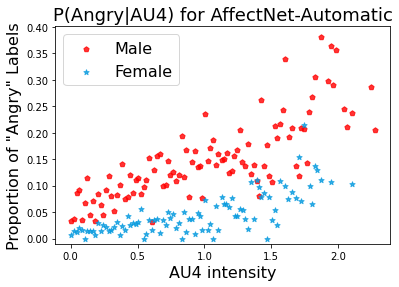

In [547]:
intensities_m, proportions_m = proportion_calc(male_frame.AU04_r, male_frame.Angry, 0.02, 35)
plt.scatter(intensities_m, proportions_m, label="Male", marker = "p", alpha=0.8, s=30, c='r')#,edgecolors='k')

intensities_f, proportions_f = proportion_calc(female_frame.AU04_r, female_frame.Angry, 0.02, 28)
plt.scatter(intensities_f, proportions_f, label="Female", marker = "*", alpha=0.8, s=30, c='#089BDF')#,edgecolors='k')


plt.xlabel('AU4 intensity', fontsize = 16)
plt.ylabel('Proportion of "Angry" Labels', fontsize = 16)
plt.title('P(Angry|AU4) for AffectNet-Automatic', fontsize = 18)
plt.legend(fontsize = 16)
plt.ylim(0 - 0.01, np.max(proportions_m + proportions_f) + 0.02)
plt.savefig('AffectNet_Automatic_AU4.pdf') 
plt.show()

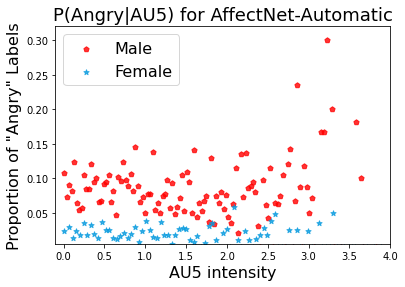

In [563]:
intensities_m, proportions_m = proportion_calc(male_frame.AU05_r, male_frame.Angry, 0.03, 10)
plt.scatter(intensities_m, proportions_m, label="Male", marker = "p", alpha=0.8, s=30, c='r')#,edgecolors='k')

intensities_f, proportions_f = proportion_calc(female_frame.AU05_r, female_frame.Angry, 0.045, 12)
plt.scatter(intensities_f, proportions_f, label="Female", marker = "*", alpha=0.8, s=30, c='#089BDF')#,edgecolors='k')


plt.xlabel('AU5 intensity', fontsize = 16)
plt.ylabel('Proportion of "Angry" Labels', fontsize = 16)
plt.title('P(Angry|AU5) for AffectNet-Automatic', fontsize = 18)
plt.legend(fontsize = 16)
plt.xlim(-0.1, 4)
plt.ylim(0.005, np.max(proportions_m + proportions_f) + 0.02)
plt.savefig('AffectNet_Automatic_AU5.pdf') 
plt.show()

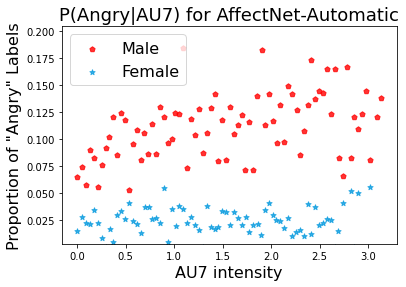

In [573]:
intensities_m, proportions_m = proportion_calc(male_frame.AU07_r, male_frame.Angry, 0.04, 57)
plt.scatter(intensities_m, proportions_m, label="Male", marker = "p", alpha=0.8, s=30, c='r')#,edgecolors='k')

intensities_f, proportions_f = proportion_calc(female_frame.AU07_r, female_frame.Angry, 0.04, 50)
plt.scatter(intensities_f, proportions_f, label="Female", marker = "*", alpha=0.8, s=30, c='#089BDF')#,edgecolors='k')


plt.xlabel('AU7 intensity', fontsize = 16)
plt.ylabel('Proportion of "Angry" Labels', fontsize = 16)
plt.title('P(Angry|AU7) for AffectNet-Automatic', fontsize = 18)
plt.legend(fontsize = 16)
plt.ylim(0.003, np.max(proportions_m + proportions_f) + 0.02)
plt.savefig('AffectNet_Automatic_AU7.pdf') 
plt.show()

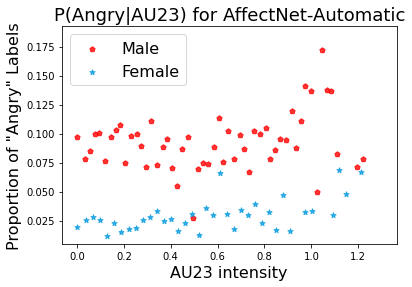

In [586]:
intensities_m, proportions_m = proportion_calc(male_frame.AU23_r, male_frame.Angry, 0.022, 40)
plt.scatter(intensities_m, proportions_m, label="Male", marker = "p", alpha=0.8, s=30, c='r')#,edgecolors='k')

intensities_f, proportions_f = proportion_calc(female_frame.AU23_r, female_frame.Angry, 0.03, 15)
plt.scatter(intensities_f, proportions_f, label="Female", marker = "*", alpha=0.8, s=30, c='#089BDF')#,edgecolors='k')


plt.xlabel('AU23 intensity', fontsize = 16)
plt.ylabel('Proportion of "Angry" Labels', fontsize = 16)
plt.title('P(Angry|AU23) for AffectNet-Automatic', fontsize = 18)
plt.legend(fontsize = 16)
plt.ylim(0.005, np.max(proportions_m + proportions_f) + 0.02)
plt.savefig('AffectNet_Automatic_AU23.pdf') 
plt.show()

To formally show that there is a significant difference between the two logistic lines, we need logistic regression:

In [587]:
formula = 'Angry ~ AU04_r + AU05_r + AU07_r + AU23_r + gender_preds'
model = smf.glm(formula = formula, data=frame, family=sm.families.Binomial())
result = model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Angry   No. Observations:                42284
Model:                            GLM   Df Residuals:                    42278
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7997.1
Date:                Sun, 17 Jan 2021   Deviance:                       15994.
Time:                        00:51:46   Pearson chi2:                 3.89e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -4.3608 

In [588]:
formula = 'Angry ~ (AU04_r + AU05_r + AU07_r + AU23_r) * gender_preds'
model = smf.glm(formula = formula, data=frame, family=sm.families.Binomial())
result = model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Angry   No. Observations:                42284
Model:                            GLM   Df Residuals:                    42274
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7992.7
Date:                Sun, 17 Jan 2021   Deviance:                       15985.
Time:                        00:52:01   Pearson chi2:                 3.92e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [589]:
formula = 'Angry ~ I(AU04_r + AU05_r + AU07_r + AU23_r) * gender_preds'
model = smf.glm(formula = formula, data=frame, family=sm.families.Binomial())
result = model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Angry   No. Observations:                42284
Model:                            GLM   Df Residuals:                    42280
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8569.7
Date:                Sun, 17 Jan 2021   Deviance:                       17139.
Time:                        00:52:12   Pearson chi2:                 4.15e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                                coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------

# KDEF

In [590]:
frame = pd.read_csv('KDEF_OpenFace_result_with_Emotion_and_Gender.csv')
print(frame.shape)
frame.head()

(2926, 54)


,ImageName,face,confidence,AU01_c,AU02_c,AU04_c,AU05_c,AU06_c,AU07_c,AU09_c,...,AU10_r_c,AU12_r_c,AU15_r_c,AU17_r_c,AU20_r_c,AU25_r_c,AU26_r_c,Emotion,Happy,Gender
0,AF01AFHL.jpg,0,0.475,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0,0,1,0,0,0,0,AF,0,F
1,AF01AFHR.jpg,0,0.975,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1,1,0,0,0,1,0,AF,0,F
2,AF01AFS.jpg,0,0.975,1.0,0.0,0.0,1.0,1.0,1.0,0.0,...,1,1,0,0,0,1,0,AF,0,F
3,AF01ANHL.jpg,0,0.425,1.0,1.0,0.0,1.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,AN,0,F
4,AF01ANHR.jpg,0,0.575,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,1,0,0,0,0,1,0,AN,0,F


In [591]:
frame['Angry'] = frame.ImageName.apply(lambda x: x[4:6] == 'AN').astype(int)
frame

,ImageName,face,confidence,AU01_c,AU02_c,AU04_c,AU05_c,AU06_c,AU07_c,AU09_c,...,AU12_r_c,AU15_r_c,AU17_r_c,AU20_r_c,AU25_r_c,AU26_r_c,Emotion,Happy,Gender,Angry
0,AF01AFHL.jpg,0,0.475,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0,1,0,0,0,0,AF,0,F,0
1,AF01AFHR.jpg,0,0.975,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1,0,0,0,1,0,AF,0,F,0
2,AF01AFS.jpg,0,0.975,1.0,0.0,0.0,1.0,1.0,1.0,0.0,...,1,0,0,0,1,0,AF,0,F,0
3,AF01ANHL.jpg,0,0.425,1.0,1.0,0.0,1.0,1.0,1.0,0.0,...,0,0,0,0,0,0,AN,0,F,1
4,AF01ANHR.jpg,0,0.575,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0,0,0,0,1,0,AN,0,F,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2921,BM35SAHR.jpg,0,0.825,1.0,1.0,1.0,0.0,1.0,1.0,0.0,...,0,0,0,0,0,0,SA,0,M,0
2922,BM35SAS.jpg,0,0.975,1.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,SA,0,M,0
2923,BM35SUHL.jpg,0,0.025,1.0,1.0,0.0,1.0,1.0,1.0,0.0,...,1,1,0,0,0,0,SU,0,M,0
2924,BM35SUHR.jpg,0,0.475,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,1,0,0,0,0,0,SU,0,M,0


In [315]:
frame = frame[frame.ImageName.apply(lambda x: x[6] == 'S')]
frame.shape

(974, 55)

In [316]:
print(list(frame.columns))

['ImageName', 'face', 'confidence', 'AU01_c', 'AU02_c', 'AU04_c', 'AU05_c', 'AU06_c', 'AU07_c', 'AU09_c', 'AU10_c', 'AU12_c', 'AU14_c', 'AU15_c', 'AU17_c', 'AU20_c', 'AU23_c', 'AU25_c', 'AU26_c', 'AU28_c', 'AU45_c', 'AU01_r', 'AU02_r', 'AU04_r', 'AU05_r', 'AU06_r', 'AU07_r', 'AU09_r', 'AU10_r', 'AU12_r', 'AU14_r', 'AU15_r', 'AU17_r', 'AU20_r', 'AU23_r', 'AU25_r', 'AU26_r', 'AU45_r', 'AU01_r_c', 'AU02_r_c', 'AU04_r_c', 'AU05_r_c', 'AU06_r_c', 'AU09_r_c', 'AU10_r_c', 'AU12_r_c', 'AU15_r_c', 'AU17_r_c', 'AU20_r_c', 'AU25_r_c', 'AU26_r_c', 'Emotion', 'Happy', 'Gender', 'Angry']


In [317]:
frame[['AU04_c', 'AU05_c', 'AU07_c', 'AU23_c']].corr()

,AU04_c,AU05_c,AU07_c,AU23_c
AU04_c,1.000000,-0.282226,0.370625,0.088153
AU05_c,-0.282226,1.000000,-0.483285,-0.074027
AU07_c,0.370625,-0.483285,1.000000,-0.027320
AU23_c,0.088153,-0.074027,-0.027320,1.000000


In [318]:
frame[['AU04_r', 'AU05_r', 'AU07_r', 'AU23_r']].corr()

,AU04_r,AU05_r,AU07_r,AU23_r
AU04_r,1.000000,-0.326677,0.462043,0.164304
AU05_r,-0.326677,1.000000,-0.449075,-0.167682
AU07_r,0.462043,-0.449075,1.000000,0.081767
AU23_r,0.164304,-0.167682,0.081767,1.000000


In [203]:
frame = frame.rename(columns={'Gender': 'gender_preds'})

In [204]:
frame = frame.dropna()
frame.shape

(974, 55)

In [205]:
frame['AU4_5_7_23_c'] = frame.AU04_c.apply(int).apply(str) + frame.AU05_c.apply(int).apply(str) + frame.AU07_c.apply(int).apply(str) + frame.AU23_c.apply(int).apply(str)
frame.AU4_5_7_23_c.value_counts()

1010    245
0100    203
0010    119
1110     71
1100     63
0000     59
0110     53
1011     50
1000     31
0101     23
1001     13
1101     13
0001     11
0011     10
0111      6
1111      4
Name: AU4_5_7_23_c, dtype: int64

In [206]:
frame['AU4_5_7_23_r_c'] = frame.AU04_r_c.apply(str) + frame.AU05_r_c.apply(str) + frame.AU07_c.apply(int).apply(str) + frame.AU23_c.apply(int).apply(str)
frame.AU4_5_7_23_r_c.value_counts()

0010    362
0000    306
1010    126
0001     47
0011     39
0100     31
1011     30
1000     19
1001     10
0101      3
0111      1
Name: AU4_5_7_23_r_c, dtype: int64

# P(expression|AU1, male) =? P(expression|AU1, female)

In [207]:
frame.gender_preds = frame.gender_preds.apply(lambda x: 'Male' if x == 'M' else 'Female')
male_frame = frame.loc[frame['gender_preds'] == 'Male']
female_frame = frame.loc[frame['gender_preds'] == 'Female']
print(male_frame.shape)
print(female_frame.shape)

(485, 57)
(489, 57)


## Anger

#### First check the simple proportion of male angry vs female angry:

In [208]:
print(male_frame.Angry.mean())
print(female_frame.Angry.mean())

0.14432989690721648
0.14314928425357873


In [209]:
print(male_frame.AU04_r_c.mean())
print(female_frame.AU04_r_c.mean())

0.1731958762886598
0.2065439672801636


In [210]:
print(male_frame.AU05_r_c.mean())
print(female_frame.AU05_r_c.mean())

0.03711340206185567
0.034764826175869123


In [211]:
print(male_frame.AU07_c.mean())
print(female_frame.AU07_c.mean())

0.5360824742268041
0.6094069529652352


In [212]:
print(male_frame.AU23_c.mean())
print(female_frame.AU23_c.mean())

0.1463917525773196
0.12065439672801637


In [213]:
print((male_frame.AU4_5_7_23_c=='1111').mean())
print((female_frame.AU4_5_7_23_c=='1111').mean())

0.0
0.0081799591002045


In [214]:
print(1-(male_frame.AU4_5_7_23_c=='0000').mean())
print(1-(female_frame.AU4_5_7_23_c=='0000').mean())

0.9402061855670103
0.9386503067484663


#### Now check for conditional probability, controlled by AU:

In [220]:
result_df = pd.concat([pd.crosstab(male_frame.AU04_r_c, male_frame.Angry, normalize = 'index')[1], pd.crosstab(female_frame.AU04_r_c, female_frame.Angry, normalize = 'index')[1]], axis=1)
result_df.columns = ['male', 'female']
result_df['diff'] = result_df.female - result_df.male
for index, row in result_df.iterrows():
    cross_tab = pd.crosstab(frame[frame.AU04_r_c == index].gender_preds, frame[frame.AU04_r_c == index].Angry, margins = True)

    cross_tab.columns = ["Not Angry", "Angry", "row_totals"]
    cross_tab.index = ["Female", "Male", "col_totals"]
    observed = cross_tab.iloc[0:2,0:2]   # Get table without totals for later use

    expected =  np.outer(cross_tab["row_totals"][0:2],
                     cross_tab.loc["col_totals"][0:2]) / len(frame[frame.AU04_r_c == index])

    expected = pd.DataFrame(expected)
    expected.columns = ["Not Angry", "Angry"]
    expected.index = ["Female", "Male"]

    if (expected>=5).sum().sum() == 4:
        chi_squared_stat = (((observed-expected)**2)/expected).sum().sum()
        p_value = 1 - stats.chi2.cdf(x=chi_squared_stat, df=1)
    else:
        chi_squared_stat = np.nan
        p_value = np.nan

    print(chi_squared_stat)
    
    result_df.loc[index, "p-value"] = p_value
result_df

2.6509312621817824
0.6838784967222806


,male,female,diff,p-value
AU04_r_c,,,,
0,0.089776,0.059278,-0.030497,0.103489
1,0.404762,0.465347,0.060585,0.408254


In [221]:
result_df = pd.concat([pd.crosstab(male_frame.AU05_r_c, male_frame.Angry, normalize = 'index')[1], pd.crosstab(female_frame.AU05_r_c, female_frame.Angry, normalize = 'index')[1]], axis=1)
result_df.columns = ['male', 'female']
result_df['diff'] = result_df.female - result_df.male
for index, row in result_df.iterrows():
    cross_tab = pd.crosstab(frame[frame.AU05_r_c == index].gender_preds, frame[frame.AU05_r_c == index].Angry, margins = True)

    cross_tab.columns = ["Not Angry", "Angry", "row_totals"]
    cross_tab.index = ["Female", "Male", "col_totals"]
    observed = cross_tab.iloc[0:2,0:2]   # Get table without totals for later use

    expected =  np.outer(cross_tab["row_totals"][0:2],
                     cross_tab.loc["col_totals"][0:2]) / len(frame[frame.AU05_r_c == index])

    expected = pd.DataFrame(expected)
    expected.columns = ["Not Angry", "Angry"]
    expected.index = ["Female", "Male"]

    if (expected>=5).sum().sum() == 4:
        chi_squared_stat = (((observed-expected)**2)/expected).sum().sum()
        p_value = 1 - stats.chi2.cdf(x=chi_squared_stat, df=1)
    else:
        chi_squared_stat = np.nan
        p_value = np.nan

    print(chi_squared_stat)
    
    result_df.loc[index, "p-value"] = p_value
result_df

0.00466517550632996


ValueError: Length mismatch: Expected axis has 2 elements, new values have 3 elements

In [216]:
result_df = pd.concat([pd.crosstab(male_frame.AU05_c, male_frame.Angry, normalize = 'index')[1], pd.crosstab(female_frame.AU05_c, female_frame.Angry, normalize = 'index')[1]], axis=1)
result_df.columns = ['male', 'female']
result_df['diff'] = result_df.female - result_df.male
for index, row in result_df.iterrows():
    cross_tab = pd.crosstab(frame[frame.AU05_c == index].gender_preds, frame[frame.AU05_c == index].Angry, margins = True)

    cross_tab.columns = ["Not Angry", "Angry", "row_totals"]
    cross_tab.index = ["Female", "Male", "col_totals"]
    observed = cross_tab.iloc[0:2,0:2]   # Get table without totals for later use

    expected =  np.outer(cross_tab["row_totals"][0:2],
                     cross_tab.loc["col_totals"][0:2]) / len(frame[frame.AU05_c == index])

    expected = pd.DataFrame(expected)
    expected.columns = ["Not Angry", "Angry"]
    expected.index = ["Female", "Male"]

    if (expected>=5).sum().sum() == 4:
        chi_squared_stat = (((observed-expected)**2)/expected).sum().sum()
        p_value = 1 - stats.chi2.cdf(x=chi_squared_stat, df=1)
    else:
        chi_squared_stat = np.nan
        p_value = np.nan

    print(chi_squared_stat)
    
    result_df.loc[index, "p-value"] = p_value
result_df

0.9880703915022963
1.4322484888622435


,male,female,diff,p-value
AU05_c,,,,
0.0,0.206897,0.173285,-0.033611,0.320214
1.0,0.071429,0.103774,0.032345,0.231398


In [217]:
result_df = pd.concat([pd.crosstab(male_frame.AU07_c, male_frame.Angry, normalize = 'index')[1], pd.crosstab(female_frame.AU07_c, female_frame.Angry, normalize = 'index')[1]], axis=1)
result_df.columns = ['male', 'female']
result_df['diff'] = result_df.female - result_df.male
for index, row in result_df.iterrows():
    cross_tab = pd.crosstab(frame[frame.AU07_c == index].gender_preds, frame[frame.AU07_c == index].Angry, margins = True)

    cross_tab.columns = ["Not Angry", "Angry", "row_totals"]
    cross_tab.index = ["Female", "Male", "col_totals"]
    observed = cross_tab.iloc[0:2,0:2]   # Get table without totals for later use

    expected =  np.outer(cross_tab["row_totals"][0:2],
                     cross_tab.loc["col_totals"][0:2]) / len(frame[frame.AU07_c == index])

    expected = pd.DataFrame(expected)
    expected.columns = ["Not Angry", "Angry"]
    expected.index = ["Female", "Male"]

    if (expected>=5).sum().sum() == 4:
        chi_squared_stat = (((observed-expected)**2)/expected).sum().sum()
        p_value = 1 - stats.chi2.cdf(x=chi_squared_stat, df=1)
    else:
        chi_squared_stat = np.nan
        p_value = np.nan

    print(chi_squared_stat)
    
    result_df.loc[index, "p-value"] = p_value
result_df

1.3449025856741617
0.2615978308182106


,male,female,diff,p-value
AU07_c,,,,
0.0,0.124444,0.089005,-0.035439,0.246171
1.0,0.161538,0.177852,0.016314,0.609025


In [218]:
result_df = pd.concat([pd.crosstab(male_frame.AU23_c, male_frame.Angry, normalize = 'index')[1], pd.crosstab(female_frame.AU23_c, female_frame.Angry, normalize = 'index')[1]], axis=1)
result_df.columns = ['male', 'female']
result_df['diff'] = result_df.female - result_df.male
for index, row in result_df.iterrows():
    cross_tab = pd.crosstab(frame[frame.AU23_c == index].gender_preds, frame[frame.AU23_c == index].Angry, margins = True)

    cross_tab.columns = ["Not Angry", "Angry", "row_totals"]
    cross_tab.index = ["Female", "Male", "col_totals"]
    observed = cross_tab.iloc[0:2,0:2]   # Get table without totals for later use

    expected =  np.outer(cross_tab["row_totals"][0:2],
                     cross_tab.loc["col_totals"][0:2]) / len(frame[frame.AU23_c == index])

    expected = pd.DataFrame(expected)
    expected.columns = ["Not Angry", "Angry"]
    expected.index = ["Female", "Male"]

    if (expected>=5).sum().sum() == 4:
        chi_squared_stat = (((observed-expected)**2)/expected).sum().sum()
        p_value = 1 - stats.chi2.cdf(x=chi_squared_stat, df=1)
    else:
        chi_squared_stat = np.nan
        p_value = np.nan

    print(chi_squared_stat)
    
    result_df.loc[index, "p-value"] = p_value
result_df

0.16594500048032412
0.3879603285573003


,male,female,diff,p-value
AU23_c,,,,
0.0,0.123188,0.132558,0.009370,0.683741
1.0,0.267606,0.220339,-0.047267,0.533373


In [222]:
result_df = pd.concat([pd.crosstab(male_frame.AU4_5_7_23_r_c, male_frame.Angry, normalize = 'index')[1], pd.crosstab(female_frame.AU4_5_7_23_r_c, female_frame.Angry, normalize = 'index')[1]], axis=1)
result_df.columns = ['male', 'female']
result_df['diff'] = result_df.female - result_df.male
for index, row in result_df.iterrows():
    cross_tab = pd.crosstab(frame[frame.AU4_5_7_23_r_c == index].gender_preds, frame[frame.AU4_5_7_23_r_c == index].Angry, margins = True)

    cross_tab.columns = ["Not Angry", "Angry", "row_totals"]
    cross_tab.index = ["Female", "Male", "col_totals"]
    observed = cross_tab.iloc[0:2,0:2]   # Get table without totals for later use

    expected =  np.outer(cross_tab["row_totals"][0:2],
                     cross_tab.loc["col_totals"][0:2]) / len(frame[frame.AU4_5_7_23_r_c == index])

    expected = pd.DataFrame(expected)
    expected.columns = ["Not Angry", "Angry"]
    expected.index = ["Female", "Male"]

    if (expected>=5).sum().sum() == 4:
        chi_squared_stat = (((observed-expected)**2)/expected).sum().sum()
        p_value = 1 - stats.chi2.cdf(x=chi_squared_stat, df=1)
    else:
        chi_squared_stat = np.nan
        p_value = np.nan

    print(chi_squared_stat)
    
    result_df.loc[index, "p-value"] = p_value
result_df

0.19952319823950118
nan
1.9544671391318076
nan


ValueError: Length mismatch: Expected axis has 2 elements, new values have 3 elements

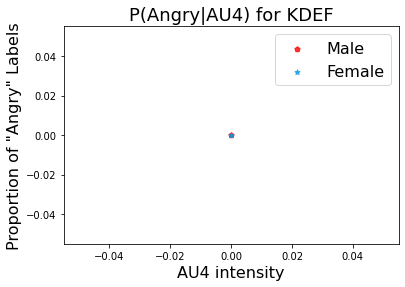

In [223]:
#AU_values_male = list(male_frame.AU06_r.unique())
AU_values_male = list(male_frame.AU04_r.value_counts()[male_frame.AU04_r.value_counts() >= 25].index)
happy_proportion_male = []
for AU_value in AU_values_male:
    subframe = male_frame.loc[male_frame.AU04_r == AU_value]
    happy_proportion_male.append(subframe.Angry.mean())
plt.scatter(AU_values_male, happy_proportion_male, label="Male", marker = "p", alpha=0.8, s=30, c='r')#,edgecolors='k')

#AU_values_female = list(female_frame.AU06_r.unique())
AU_values_female = list(female_frame.AU04_r.value_counts()[female_frame.AU04_r.value_counts() >= 25].index)
happy_proportion_female = []
for AU_value in AU_values_female:
    subframe = female_frame.loc[female_frame.AU04_r == AU_value]
    happy_proportion_female.append(subframe.Angry.mean())
plt.scatter(AU_values_female, happy_proportion_female, label="Female", marker = "*", alpha=0.8, s=30, c='#089BDF')#,edgecolors='k')


plt.xlabel('AU4 intensity', fontsize = 16)
plt.ylabel('Proportion of "Angry" Labels', fontsize = 16)
plt.title('P(Angry|AU4) for KDEF', fontsize = 18)
plt.legend(fontsize = 16)
#plt.xlim(-0.1, 3)
#plt.savefig('ExpW_AU6.pdf') 
plt.show()

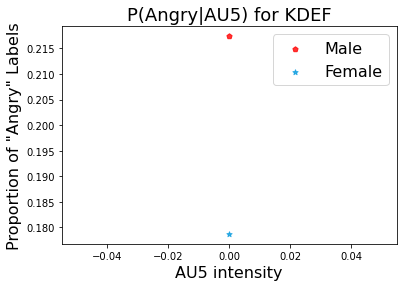

In [224]:
#AU_values_male = list(male_frame.AU06_r.unique())
AU_values_male = list(male_frame.AU05_r.value_counts()[male_frame.AU05_r.value_counts() >= 25].index)
happy_proportion_male = []
for AU_value in AU_values_male:
    subframe = male_frame.loc[male_frame.AU05_r == AU_value]
    happy_proportion_male.append(subframe.Angry.mean())
plt.scatter(AU_values_male, happy_proportion_male, label="Male", marker = "p", alpha=0.8, s=30, c='r')#,edgecolors='k')

#AU_values_female = list(female_frame.AU06_r.unique())
AU_values_female = list(female_frame.AU05_r.value_counts()[female_frame.AU05_r.value_counts() >= 25].index)
happy_proportion_female = []
for AU_value in AU_values_female:
    subframe = female_frame.loc[female_frame.AU05_r == AU_value]
    happy_proportion_female.append(subframe.Angry.mean())
plt.scatter(AU_values_female, happy_proportion_female, label="Female", marker = "*", alpha=0.8, s=30, c='#089BDF')#,edgecolors='k')


plt.xlabel('AU5 intensity', fontsize = 16)
plt.ylabel('Proportion of "Angry" Labels', fontsize = 16)
plt.title('P(Angry|AU5) for KDEF', fontsize = 18)
plt.legend(fontsize = 16)
#plt.xlim(-0.1, 3)
#plt.savefig('ExpW_AU12.pdf') 
plt.show()

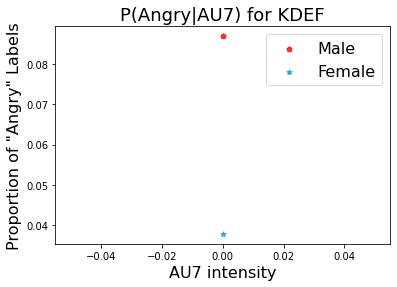

In [225]:
#AU_values_male = list(male_frame.AU06_r.unique())
AU_values_male = list(male_frame.AU07_r.value_counts()[male_frame.AU07_r.value_counts() >= 25].index)
happy_proportion_male = []
for AU_value in AU_values_male:
    subframe = male_frame.loc[male_frame.AU07_r == AU_value]
    happy_proportion_male.append(subframe.Angry.mean())
plt.scatter(AU_values_male, happy_proportion_male, label="Male", marker = "p", alpha=0.8, s=30, c='r')#,edgecolors='k')

#AU_values_female = list(female_frame.AU06_r.unique())
AU_values_female = list(female_frame.AU07_r.value_counts()[female_frame.AU07_r.value_counts() >= 25].index)
happy_proportion_female = []
for AU_value in AU_values_female:
    subframe = female_frame.loc[female_frame.AU07_r == AU_value]
    happy_proportion_female.append(subframe.Angry.mean())
plt.scatter(AU_values_female, happy_proportion_female, label="Female", marker = "*", alpha=0.8, s=30, c='#089BDF')#,edgecolors='k')


plt.xlabel('AU7 intensity', fontsize = 16)
plt.ylabel('Proportion of "Angry" Labels', fontsize = 16)
plt.title('P(Angry|AU7) for KDEF', fontsize = 18)
plt.legend(fontsize = 16)
#plt.xlim(-0.1, 3)
#plt.savefig('ExpW_AU12.pdf') 
plt.show()

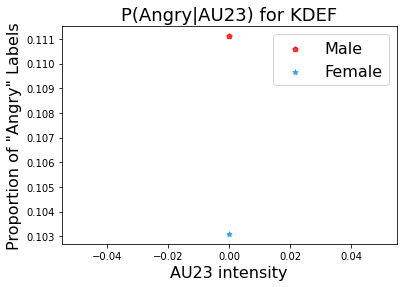

In [226]:
#AU_values_male = list(male_frame.AU06_r.unique())
AU_values_male = list(male_frame.AU23_r.value_counts()[male_frame.AU23_r.value_counts() >= 25].index)
happy_proportion_male = []
for AU_value in AU_values_male:
    subframe = male_frame.loc[male_frame.AU23_r == AU_value]
    happy_proportion_male.append(subframe.Angry.mean())
plt.scatter(AU_values_male, happy_proportion_male, label="Male", marker = "p", alpha=0.8, s=30, c='r')#,edgecolors='k')

#AU_values_female = list(female_frame.AU06_r.unique())
AU_values_female = list(female_frame.AU23_r.value_counts()[female_frame.AU23_r.value_counts() >= 25].index)
happy_proportion_female = []
for AU_value in AU_values_female:
    subframe = female_frame.loc[female_frame.AU23_r == AU_value]
    happy_proportion_female.append(subframe.Angry.mean())
plt.scatter(AU_values_female, happy_proportion_female, label="Female", marker = "*", alpha=0.8, s=30, c='#089BDF')#,edgecolors='k')


plt.xlabel('AU23 intensity', fontsize = 16)
plt.ylabel('Proportion of "Angry" Labels', fontsize = 16)
plt.title('P(Angry|AU23) for KDEF', fontsize = 18)
plt.legend(fontsize = 16)
#plt.xlim(-0.1, 3)
#plt.savefig('ExpW_AU12.pdf') 
plt.show()

To formally show that there is a significant difference between the two logistic lines, we need logistic regression:

In [227]:
formula = 'Angry ~ AU04_r + AU05_r + AU07_r + AU23_r + gender_preds'
model = smf.glm(formula = formula, data=frame, family=sm.families.Binomial())
result = model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Angry   No. Observations:                  974
Model:                            GLM   Df Residuals:                      968
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -225.38
Date:                Thu, 24 Dec 2020   Deviance:                       450.76
Time:                        11:47:30   Pearson chi2:                 1.07e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -3.5471 

In [228]:
formula = 'Angry ~ (AU04_r + AU05_r + AU07_r + AU23_r) * gender_preds'
model = smf.glm(formula = formula, data=frame, family=sm.families.Binomial())
result = model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Angry   No. Observations:                  974
Model:                            GLM   Df Residuals:                      964
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -221.26
Date:                Thu, 24 Dec 2020   Deviance:                       442.53
Time:                        11:47:31   Pearson chi2:                     854.
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [229]:
formula = 'Angry ~ I(AU04_r + AU05_r + AU07_r + AU23_r) * gender_preds'
model = smf.glm(formula = formula, data=frame, family=sm.families.Binomial())
result = model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Angry   No. Observations:                  974
Model:                            GLM   Df Residuals:                      970
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -367.99
Date:                Thu, 24 Dec 2020   Deviance:                       735.98
Time:                        11:47:32   Pearson chi2:                     895.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                                                                coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------

# Chicago Face

In [319]:
frame = pd.read_csv('ChicagoFace_with_AU_cleanedup.csv')
print(frame.shape)
frame.head()

(1207, 54)


,ImageName,Gender,Race,Expression,face,confidence,AU01_r,AU02_r,AU04_r,AU05_r,...,AU05_r_c,AU06_r_c,AU09_r_c,AU10_r_c,AU12_r_c,AU15_r_c,AU17_r_c,AU20_r_c,AU25_r_c,AU26_r_c
0,CFD-WM-239-128-N.jpg,M,W,Neutral,0,0.975,0.00,0.00,0.49,0.00,...,0,0,0,1,0,0,0,0,1,0
1,CFD-BM-219-141-N.jpg,M,B,Neutral,0,0.975,1.69,1.28,0.00,0.36,...,0,0,0,0,0,1,0,0,1,0
2,CFD-WF-034-016-A.jpg,F,W,Angry,0,0.975,1.30,0.02,1.70,2.03,...,0,0,0,1,0,0,0,0,0,0
3,CFD-BM-030-065-F.jpg,M,B,Fear,0,0.975,2.90,4.65,0.00,2.64,...,0,0,0,1,1,0,0,0,1,0
4,CFD-LM-237-264-N.jpg,M,L,Neutral,0,0.975,1.01,0.21,1.05,0.13,...,0,0,0,1,0,0,0,0,0,0


In [320]:
frame.Expression.value_counts()

Neutral    597
Happy      307
Angry      154
Fear       149
Name: Expression, dtype: int64

In [321]:
print(list(frame.columns))

['ImageName', 'Gender', 'Race', 'Expression', 'face', 'confidence', 'AU01_r', 'AU02_r', 'AU04_r', 'AU05_r', 'AU06_r', 'AU07_r', 'AU09_r', 'AU10_r', 'AU12_r', 'AU14_r', 'AU15_r', 'AU17_r', 'AU20_r', 'AU23_r', 'AU25_r', 'AU26_r', 'AU45_r', 'AU01_c', 'AU02_c', 'AU04_c', 'AU05_c', 'AU06_c', 'AU07_c', 'AU09_c', 'AU10_c', 'AU12_c', 'AU14_c', 'AU15_c', 'AU17_c', 'AU20_c', 'AU23_c', 'AU25_c', 'AU26_c', 'AU28_c', 'AU45_c', 'AU01_r_c', 'AU02_r_c', 'AU04_r_c', 'AU05_r_c', 'AU06_r_c', 'AU09_r_c', 'AU10_r_c', 'AU12_r_c', 'AU15_r_c', 'AU17_r_c', 'AU20_r_c', 'AU25_r_c', 'AU26_r_c']


In [322]:
frame[['AU04_c', 'AU05_c', 'AU07_c', 'AU23_c']].corr()

,AU04_c,AU05_c,AU07_c,AU23_c
AU04_c,1.000000,-0.045516,0.197290,0.092592
AU05_c,-0.045516,1.000000,-0.192794,-0.035364
AU07_c,0.197290,-0.192794,1.000000,0.097267
AU23_c,0.092592,-0.035364,0.097267,1.000000


In [323]:
frame[['AU04_r', 'AU05_r', 'AU07_r', 'AU23_r']].corr()

,AU04_r,AU05_r,AU07_r,AU23_r
AU04_r,1.000000,-0.158118,0.333740,0.213545
AU05_r,-0.158118,1.000000,-0.278749,-0.196621
AU07_r,0.333740,-0.278749,1.000000,0.184960
AU23_r,0.213545,-0.196621,0.184960,1.000000


In [233]:
frame = frame.rename(columns={'Gender': 'gender_preds'})

In [234]:
frame['Angry'] = (frame['Expression'] =='Angry').astype(int)
frame['Fear'] = (frame['Expression'] == 'Fear').astype(int)
frame['Happy'] = (frame['Expression'] =='Happy').astype(int)
frame['Neutral'] = (frame['Expression'] == 'Neutral').astype(int)

In [235]:
frame = frame.dropna()
frame.shape

(1207, 58)

In [236]:
frame['AU4_5_7_23_c'] = frame.AU04_c.apply(int).apply(str) + frame.AU05_c.apply(int).apply(str) + frame.AU07_c.apply(int).apply(str) + frame.AU23_c.apply(int).apply(str)
frame.AU4_5_7_23_c.value_counts()

0000    233
0010    189
0100    131
0001    104
0011     95
1011     86
1010     85
1000     66
0101     54
0110     34
1001     30
1100     29
1110     24
0111     19
1111     17
1101     11
Name: AU4_5_7_23_c, dtype: int64

In [237]:
frame['AU4_5_7_23_r_c'] = frame.AU04_r_c.apply(str) + frame.AU05_r_c.apply(str) + frame.AU07_c.apply(int).apply(str) + frame.AU23_c.apply(int).apply(str)
frame.AU4_5_7_23_r_c.value_counts()

0000    431
0010    309
0001    190
0011    177
1011     35
0100     25
1010     20
0101      7
0111      5
1000      3
0110      3
1001      2
Name: AU4_5_7_23_r_c, dtype: int64

# P(expression|AU1, male) =? P(expression|AU1, female)

In [238]:
frame.gender_preds = frame.gender_preds.apply(lambda x: 'Male' if x == 'M' else 'Female')
male_frame = frame.loc[frame['gender_preds'] == 'Male']
female_frame = frame.loc[frame['gender_preds'] == 'Female']
print(male_frame.shape)
print(female_frame.shape)

(563, 60)
(644, 60)


## Anger

#### First check the simple proportion of male angry vs female angry:

In [239]:
print(male_frame.Angry.mean())
print(female_frame.Angry.mean())

0.12433392539964476
0.13043478260869565


In [240]:
print(male_frame.AU04_r_c.mean())
print(female_frame.AU04_r_c.mean())

0.05328596802841918
0.046583850931677016


In [241]:
print(male_frame.AU05_r_c.mean())
print(female_frame.AU05_r_c.mean())

0.04262877442273535
0.024844720496894408


In [242]:
print(male_frame.AU07_c.mean())
print(female_frame.AU07_c.mean())

0.4493783303730018
0.45962732919254656


In [243]:
print(male_frame.AU23_c.mean())
print(female_frame.AU23_c.mean())

0.3410301953818828
0.34782608695652173


In [244]:
print((male_frame.AU4_5_7_23_c=='1111').mean())
print((female_frame.AU4_5_7_23_c=='1111').mean())

0.014209591474245116
0.013975155279503106


In [245]:
print(1-(male_frame.AU4_5_7_23_c=='0000').mean())
print(1-(female_frame.AU4_5_7_23_c=='0000').mean())

0.7779751332149201
0.8322981366459627


#### Now check for conditional probability, controlled by AU:

In [251]:
result_df = pd.concat([pd.crosstab(male_frame.AU04_r_c, male_frame.Angry, normalize = 'index')[1], pd.crosstab(female_frame.AU04_r_c, female_frame.Angry, normalize = 'index')[1]], axis=1)
result_df.columns = ['male', 'female']
result_df['diff'] = result_df.female - result_df.male
for index, row in result_df.iterrows():
    cross_tab = pd.crosstab(frame[frame.AU04_r_c == index].gender_preds, frame[frame.AU04_r_c == index].Angry, margins = True)

    cross_tab.columns = ["Not Angry", "Angry", "row_totals"]
    cross_tab.index = ["Female", "Male", "col_totals"]
    observed = cross_tab.iloc[0:2,0:2]   # Get table without totals for later use

    expected =  np.outer(cross_tab["row_totals"][0:2],
                     cross_tab.loc["col_totals"][0:2]) / len(frame[frame.AU04_r_c == index])

    expected = pd.DataFrame(expected)
    expected.columns = ["Not Angry", "Angry"]
    expected.index = ["Female", "Male"]

    if (expected>=5).sum().sum() == 4:
        chi_squared_stat = (((observed-expected)**2)/expected).sum().sum()
        p_value = 1 - stats.chi2.cdf(x=chi_squared_stat, df=1)
    else:
        chi_squared_stat = np.nan
        p_value = np.nan

    print(chi_squared_stat)
    
    result_df.loc[index, "p-value"] = p_value
result_df

0.9713523196176421
nan


,male,female,diff,p-value
AU04_r_c,,,,
0,0.075047,0.091205,0.016158,0.324343
1,1.000000,0.933333,-0.066667,NaN


In [252]:
result_df = pd.concat([pd.crosstab(male_frame.AU05_r_c, male_frame.Angry, normalize = 'index')[1], pd.crosstab(female_frame.AU05_r_c, female_frame.Angry, normalize = 'index')[1]], axis=1)
result_df.columns = ['male', 'female']
result_df['diff'] = result_df.female - result_df.male
for index, row in result_df.iterrows():
    cross_tab = pd.crosstab(frame[frame.AU05_r_c == index].gender_preds, frame[frame.AU05_r_c == index].Angry, margins = True)

    cross_tab.columns = ["Not Angry", "Angry", "row_totals"]
    cross_tab.index = ["Female", "Male", "col_totals"]
    observed = cross_tab.iloc[0:2,0:2]   # Get table without totals for later use

    expected =  np.outer(cross_tab["row_totals"][0:2],
                     cross_tab.loc["col_totals"][0:2]) / len(frame[frame.AU05_r_c == index])

    expected = pd.DataFrame(expected)
    expected.columns = ["Not Angry", "Angry"]
    expected.index = ["Female", "Male"]

    if (expected>=5).sum().sum() == 4:
        chi_squared_stat = (((observed-expected)**2)/expected).sum().sum()
        p_value = 1 - stats.chi2.cdf(x=chi_squared_stat, df=1)
    else:
        chi_squared_stat = np.nan
        p_value = np.nan

    print(chi_squared_stat)
    
    result_df.loc[index, "p-value"] = p_value
result_df

0.03827401823801806


ValueError: Length mismatch: Expected axis has 2 elements, new values have 3 elements

In [247]:
result_df = pd.concat([pd.crosstab(male_frame.AU05_c, male_frame.Angry, normalize = 'index')[1], pd.crosstab(female_frame.AU05_c, female_frame.Angry, normalize = 'index')[1]], axis=1)
result_df.columns = ['male', 'female']
result_df['diff'] = result_df.female - result_df.male
for index, row in result_df.iterrows():
    cross_tab = pd.crosstab(frame[frame.AU05_c == index].gender_preds, frame[frame.AU05_c == index].Angry, margins = True)

    cross_tab.columns = ["Not Angry", "Angry", "row_totals"]
    cross_tab.index = ["Female", "Male", "col_totals"]
    observed = cross_tab.iloc[0:2,0:2]   # Get table without totals for later use

    expected =  np.outer(cross_tab["row_totals"][0:2],
                     cross_tab.loc["col_totals"][0:2]) / len(frame[frame.AU05_c == index])

    expected = pd.DataFrame(expected)
    expected.columns = ["Not Angry", "Angry"]
    expected.index = ["Female", "Male"]

    if (expected>=5).sum().sum() == 4:
        chi_squared_stat = (((observed-expected)**2)/expected).sum().sum()
        p_value = 1 - stats.chi2.cdf(x=chi_squared_stat, df=1)
    else:
        chi_squared_stat = np.nan
        p_value = np.nan

    print(chi_squared_stat)
    
    result_df.loc[index, "p-value"] = p_value
result_df

0.9630136986301376
0.5768908472337628


,male,female,diff,p-value
AU05_c,,,,
0.0,0.13242,0.155556,0.023135,0.326429
1.0,0.09600,0.072165,-0.023835,0.447534


In [248]:
result_df = pd.concat([pd.crosstab(male_frame.AU07_c, male_frame.Angry, normalize = 'index')[1], pd.crosstab(female_frame.AU07_c, female_frame.Angry, normalize = 'index')[1]], axis=1)
result_df.columns = ['male', 'female']
result_df['diff'] = result_df.female - result_df.male
for index, row in result_df.iterrows():
    cross_tab = pd.crosstab(frame[frame.AU07_c == index].gender_preds, frame[frame.AU07_c == index].Angry, margins = True)

    cross_tab.columns = ["Not Angry", "Angry", "row_totals"]
    cross_tab.index = ["Female", "Male", "col_totals"]
    observed = cross_tab.iloc[0:2,0:2]   # Get table without totals for later use

    expected =  np.outer(cross_tab["row_totals"][0:2],
                     cross_tab.loc["col_totals"][0:2]) / len(frame[frame.AU07_c == index])

    expected = pd.DataFrame(expected)
    expected.columns = ["Not Angry", "Angry"]
    expected.index = ["Female", "Male"]

    if (expected>=5).sum().sum() == 4:
        chi_squared_stat = (((observed-expected)**2)/expected).sum().sum()
        p_value = 1 - stats.chi2.cdf(x=chi_squared_stat, df=1)
    else:
        chi_squared_stat = np.nan
        p_value = np.nan

    print(chi_squared_stat)
    
    result_df.loc[index, "p-value"] = p_value
result_df

1.454141514459941
0.10724044449958253


,male,female,diff,p-value
AU07_c,,,,
0.0,0.025806,0.043103,0.017297,0.227865
1.0,0.245059,0.233108,-0.011951,0.743308


In [249]:
result_df = pd.concat([pd.crosstab(male_frame.AU23_c, male_frame.Angry, normalize = 'index')[1], pd.crosstab(female_frame.AU23_c, female_frame.Angry, normalize = 'index')[1]], axis=1)
result_df.columns = ['male', 'female']
result_df['diff'] = result_df.female - result_df.male
for index, row in result_df.iterrows():
    cross_tab = pd.crosstab(frame[frame.AU23_c == index].gender_preds, frame[frame.AU23_c == index].Angry, margins = True)

    cross_tab.columns = ["Not Angry", "Angry", "row_totals"]
    cross_tab.index = ["Female", "Male", "col_totals"]
    observed = cross_tab.iloc[0:2,0:2]   # Get table without totals for later use

    expected =  np.outer(cross_tab["row_totals"][0:2],
                     cross_tab.loc["col_totals"][0:2]) / len(frame[frame.AU23_c == index])

    expected = pd.DataFrame(expected)
    expected.columns = ["Not Angry", "Angry"]
    expected.index = ["Female", "Male"]

    if (expected>=5).sum().sum() == 4:
        chi_squared_stat = (((observed-expected)**2)/expected).sum().sum()
        p_value = 1 - stats.chi2.cdf(x=chi_squared_stat, df=1)
    else:
        chi_squared_stat = np.nan
        p_value = np.nan

    print(chi_squared_stat)
    
    result_df.loc[index, "p-value"] = p_value
result_df

0.13768796246470813
0.47613023704105295


,male,female,diff,p-value
AU23_c,,,,
0.0,0.080863,0.073810,-0.007053,0.71059
1.0,0.208333,0.236607,0.028274,0.49018


In [253]:
result_df = pd.concat([pd.crosstab(male_frame.AU4_5_7_23_r_c, male_frame.Angry, normalize = 'index')[1], pd.crosstab(female_frame.AU4_5_7_23_r_c, female_frame.Angry, normalize = 'index')[1]], axis=1)
result_df.columns = ['male', 'female']
result_df['diff'] = result_df.female - result_df.male
for index, row in result_df.iterrows():
    cross_tab = pd.crosstab(frame[frame.AU4_5_7_23_r_c == index].gender_preds, frame[frame.AU4_5_7_23_r_c == index].Angry, margins = True)

    cross_tab.columns = ["Not Angry", "Angry", "row_totals"]
    cross_tab.index = ["Female", "Male", "col_totals"]
    observed = cross_tab.iloc[0:2,0:2]   # Get table without totals for later use

    expected =  np.outer(cross_tab["row_totals"][0:2],
                     cross_tab.loc["col_totals"][0:2]) / len(frame[frame.AU4_5_7_23_r_c == index])

    expected = pd.DataFrame(expected)
    expected.columns = ["Not Angry", "Angry"]
    expected.index = ["Female", "Male"]

    if (expected>=5).sum().sum() == 4:
        chi_squared_stat = (((observed-expected)**2)/expected).sum().sum()
        p_value = 1 - stats.chi2.cdf(x=chi_squared_stat, df=1)
    else:
        chi_squared_stat = np.nan
        p_value = np.nan

    print(chi_squared_stat)
    
    result_df.loc[index, "p-value"] = p_value
result_df

nan
nan
0.44416644600182836
0.5623046816698201


ValueError: Length mismatch: Expected axis has 2 elements, new values have 3 elements

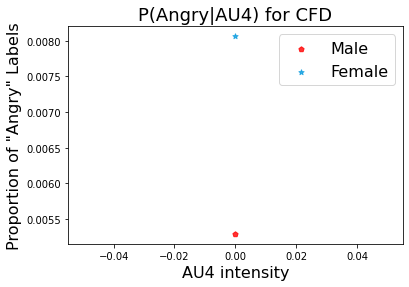

In [254]:
#AU_values_male = list(male_frame.AU06_r.unique())
AU_values_male = list(male_frame.AU04_r.value_counts()[male_frame.AU04_r.value_counts() >= 25].index)
happy_proportion_male = []
for AU_value in AU_values_male:
    subframe = male_frame.loc[male_frame.AU04_r == AU_value]
    happy_proportion_male.append(subframe.Angry.mean())
plt.scatter(AU_values_male, happy_proportion_male, label="Male", marker = "p", alpha=0.8, s=30, c='r')#,edgecolors='k')

#AU_values_female = list(female_frame.AU06_r.unique())
AU_values_female = list(female_frame.AU04_r.value_counts()[female_frame.AU04_r.value_counts() >= 25].index)
happy_proportion_female = []
for AU_value in AU_values_female:
    subframe = female_frame.loc[female_frame.AU04_r == AU_value]
    happy_proportion_female.append(subframe.Angry.mean())
plt.scatter(AU_values_female, happy_proportion_female, label="Female", marker = "*", alpha=0.8, s=30, c='#089BDF')#,edgecolors='k')


plt.xlabel('AU4 intensity', fontsize = 16)
plt.ylabel('Proportion of "Angry" Labels', fontsize = 16)
plt.title('P(Angry|AU4) for CFD', fontsize = 18)
plt.legend(fontsize = 16)
#plt.xlim(-0.1, 3)
#plt.savefig('ExpW_AU6.pdf') 
plt.show()

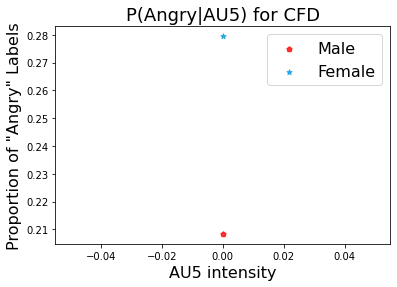

In [255]:
#AU_values_male = list(male_frame.AU06_r.unique())
AU_values_male = list(male_frame.AU05_r.value_counts()[male_frame.AU05_r.value_counts() >= 25].index)
happy_proportion_male = []
for AU_value in AU_values_male:
    subframe = male_frame.loc[male_frame.AU05_r == AU_value]
    happy_proportion_male.append(subframe.Angry.mean())
plt.scatter(AU_values_male, happy_proportion_male, label="Male", marker = "p", alpha=0.8, s=30, c='r')#,edgecolors='k')

#AU_values_female = list(female_frame.AU06_r.unique())
AU_values_female = list(female_frame.AU05_r.value_counts()[female_frame.AU05_r.value_counts() >= 25].index)
happy_proportion_female = []
for AU_value in AU_values_female:
    subframe = female_frame.loc[female_frame.AU05_r == AU_value]
    happy_proportion_female.append(subframe.Angry.mean())
plt.scatter(AU_values_female, happy_proportion_female, label="Female", marker = "*", alpha=0.8, s=30, c='#089BDF')#,edgecolors='k')


plt.xlabel('AU5 intensity', fontsize = 16)
plt.ylabel('Proportion of "Angry" Labels', fontsize = 16)
plt.title('P(Angry|AU5) for CFD', fontsize = 18)
plt.legend(fontsize = 16)
#plt.xlim(-0.1, 3)
#plt.savefig('ExpW_AU12.pdf') 
plt.show()

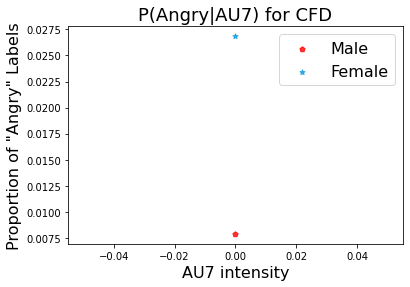

In [256]:
#AU_values_male = list(male_frame.AU06_r.unique())
AU_values_male = list(male_frame.AU07_r.value_counts()[male_frame.AU07_r.value_counts() >= 25].index)
happy_proportion_male = []
for AU_value in AU_values_male:
    subframe = male_frame.loc[male_frame.AU07_r == AU_value]
    happy_proportion_male.append(subframe.Angry.mean())
plt.scatter(AU_values_male, happy_proportion_male, label="Male", marker = "p", alpha=0.8, s=30, c='r')#,edgecolors='k')

#AU_values_female = list(female_frame.AU06_r.unique())
AU_values_female = list(female_frame.AU07_r.value_counts()[female_frame.AU07_r.value_counts() >= 25].index)
happy_proportion_female = []
for AU_value in AU_values_female:
    subframe = female_frame.loc[female_frame.AU07_r == AU_value]
    happy_proportion_female.append(subframe.Angry.mean())
plt.scatter(AU_values_female, happy_proportion_female, label="Female", marker = "*", alpha=0.8, s=30, c='#089BDF')#,edgecolors='k')


plt.xlabel('AU7 intensity', fontsize = 16)
plt.ylabel('Proportion of "Angry" Labels', fontsize = 16)
plt.title('P(Angry|AU7) for CFD', fontsize = 18)
plt.legend(fontsize = 16)
#plt.xlim(-0.1, 3)
#plt.savefig('ExpW_AU12.pdf') 
plt.show()

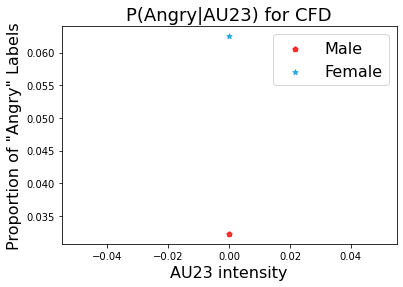

In [257]:
#AU_values_male = list(male_frame.AU06_r.unique())
AU_values_male = list(male_frame.AU23_r.value_counts()[male_frame.AU23_r.value_counts() >= 25].index)
happy_proportion_male = []
for AU_value in AU_values_male:
    subframe = male_frame.loc[male_frame.AU23_r == AU_value]
    happy_proportion_male.append(subframe.Angry.mean())
plt.scatter(AU_values_male, happy_proportion_male, label="Male", marker = "p", alpha=0.8, s=30, c='r')#,edgecolors='k')

#AU_values_female = list(female_frame.AU06_r.unique())
AU_values_female = list(female_frame.AU23_r.value_counts()[female_frame.AU23_r.value_counts() >= 25].index)
happy_proportion_female = []
for AU_value in AU_values_female:
    subframe = female_frame.loc[female_frame.AU23_r == AU_value]
    happy_proportion_female.append(subframe.Angry.mean())
plt.scatter(AU_values_female, happy_proportion_female, label="Female", marker = "*", alpha=0.8, s=30, c='#089BDF')#,edgecolors='k')


plt.xlabel('AU23 intensity', fontsize = 16)
plt.ylabel('Proportion of "Angry" Labels', fontsize = 16)
plt.title('P(Angry|AU23) for CFD', fontsize = 18)
plt.legend(fontsize = 16)
#plt.xlim(-0.1, 3)
#plt.savefig('ExpW_AU12.pdf') 
plt.show()

To formally show that there is a significant difference between the two logistic lines, we need logistic regression:

In [258]:
formula = 'Angry ~ AU04_r + AU05_r + AU07_r + AU23_r + gender_preds'
model = smf.glm(formula = formula, data=frame, family=sm.families.Binomial())
result = model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Angry   No. Observations:                 1207
Model:                            GLM   Df Residuals:                     1201
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -148.01
Date:                Thu, 24 Dec 2020   Deviance:                       296.03
Time:                        11:52:06   Pearson chi2:                 1.94e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -6.9385 

In [259]:
formula = 'Angry ~ (AU04_r + AU05_r + AU07_r + AU23_r) * gender_preds'
model = smf.glm(formula = formula, data=frame, family=sm.families.Binomial())
result = model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Angry   No. Observations:                 1207
Model:                            GLM   Df Residuals:                     1197
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -146.76
Date:                Thu, 24 Dec 2020   Deviance:                       293.53
Time:                        11:52:07   Pearson chi2:                 2.32e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [260]:
formula = 'Angry ~ I(AU04_r + AU05_r + AU07_r + AU23_r) * gender_preds'
model = smf.glm(formula = formula, data=frame, family=sm.families.Binomial())
result = model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Angry   No. Observations:                 1207
Model:                            GLM   Df Residuals:                     1203
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -276.14
Date:                Thu, 24 Dec 2020   Deviance:                       552.29
Time:                        11:52:07   Pearson chi2:                 1.22e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                                coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------